# Predicting the final temperature of a steel alloy

## <font color='blue'>Preliminary Step: Importing Required Libraries</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats as st
import time
import os
from sklearn.metrics import mean_absolute_error
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

!pip install lightgbm
from lightgbm import LGBMRegressor
import lightgbm

!pip install catboost
from catboost import CatBoostRegressor

import warnings
warnings.simplefilter('ignore')

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


## <font color='blue'>Step 1/8: Data Import</font>

In [2]:
# difining the paths to the .csv files

# local paths
path_data_arc_new = r'C:\Users\exeve\OneDrive\Escritorio\fpp\data_arc_new.csv'
path_data_bulk_new = r'C:\Users\exeve\OneDrive\Escritorio\fpp\data_bulk_new.csv'
path_data_bulk_time_new = r'C:\Users\exeve\OneDrive\Escritorio\fpp\data_bulk_time_new.csv'
path_data_gas_new = r'C:\Users\exeve\OneDrive\Escritorio\fpp\data_gas_new.csv'
path_data_temp_new = r'C:\Users\exeve\OneDrive\Escritorio\fpp\data_temp_new.csv'
path_data_wire_new = r'C:\Users\exeve\OneDrive\Escritorio\fpp\data_wire_new.csv'
path_data_wire_time_new = r'C:\Users\exeve\OneDrive\Escritorio\fpp\data_wire_time_new.csv'

# yandex practicum paths
yandex_path_data_arc_new = '/datasets/data_arc_new.csv'
yandex_path_data_bulk_new = '/datasets/data_bulk_new.csv'
yandex_path_data_bulk_time_new = '/datasets/data_bulk_time_new.csv'
yandex_path_data_gas_new = '/datasets/data_gas_new.csv'
yandex_path_data_temp_new = '/datasets/data_temp_new.csv'
yandex_path_data_wire_new = '/datasets/data_wire_new.csv'
yandex_path_data_wire_time_new = '/datasets/data_wire_time_new.csv'

In [3]:
# loading each dataframe

# ARC_NEW_DF
try:
    if os.path.exists(path_data_arc_new):
        arc_new_df = pd.read_csv(path_data_arc_new, parse_dates = [1,2])
    elif os.path.exists(yandex_path_data_arc_new):
        arc_new_df = pd.read_csv(yandex_path_data_arc_new, parse_dates = [1,2])
except:
    print('Something went wrong with the "arc_new" path')
    
# BULK_NEW_DF   
try:
    if os.path.exists(path_data_bulk_new):
        bulk_new_df = pd.read_csv(path_data_bulk_new, on_bad_lines='warn')
    elif os.path.exists(yandex_path_data_arc_new):
        bulk_new_df = pd.read_csv(yandex_path_data_bulk_new)
except:
    print('Something went wrong with the "bulk_new" path')
    
#BULK_TIME_NEW_DF   
try:
    if os.path.exists(path_data_bulk_time_new):
        bulk_time_new_df = pd.read_csv(path_data_bulk_time_new, parse_dates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    elif os.path.exists(yandex_path_data_bulk_time_new):
        bulk_time_new_df = pd.read_csv(yandex_path_data_bulk_time_new, parse_dates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
except:
    print('Something went wrong with the "bulk_time_new" path')
    
# GAS_NEW_DF
try:
    if os.path.exists(path_data_gas_new):
        gas_new_df = pd.read_csv(path_data_gas_new)
    elif os.path.exists(yandex_path_data_gas_new):
        gas_new_df = pd.read_csv(yandex_path_data_gas_new)
except:
    print('Something went wrong with the "gas_new" path')

# TEMP_NEW_DF
try:
    if os.path.exists(path_data_temp_new):
        temp_new_df = pd.read_csv(path_data_temp_new, parse_dates = [1])
    elif os.path.exists(yandex_path_data_temp_new):
        temp_new_df = pd.read_csv(yandex_path_data_temp_new, parse_dates = [1])
except:
    print('Something went wrong with the "temp_new" path')
    
# WIRE_NEW_DF  
try:
    if os.path.exists(path_data_wire_new):
        wire_new_df = pd.read_csv(path_data_wire_new)
    elif os.path.exists(yandex_path_data_wire_new):
        wire_new_df = pd.read_csv(yandex_path_data_wire_new)
except:
    print('Something went wrong with the "wire_new" path')

# WIRE_TIME_NEW_DF
try:
    if os.path.exists(path_data_wire_time_new):
        wire_time_new_df = pd.read_csv(path_data_wire_time_new, parse_dates = [1,2,3,4,5,6,7,8,9])
    elif os.path.exists(yandex_path_data_wire_time_new):
        wire_time_new_df = pd.read_csv(yandex_path_data_wire_time_new, parse_dates = [1,2,3,4,5,6,7,8,9])
except:
    print('Something went wrong with the "wire_time_new" path')

## <font color='blue'>Step 2/8: Exploratory data analysis and preprocessing</font> 

### <font color='violet'>Study of data on electrodes  (arc_new_df)</font>

In [4]:
arc_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


#### Let's rename the column names for convenience

In [5]:
arc_new_df.columns = ['key', 'start_heat', 'end_heat', 'active_power', 'reactive_power']                         

#### Let's see what the data looks like

In [6]:
arc_new_df.head()

,key,start_heat,end_heat,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


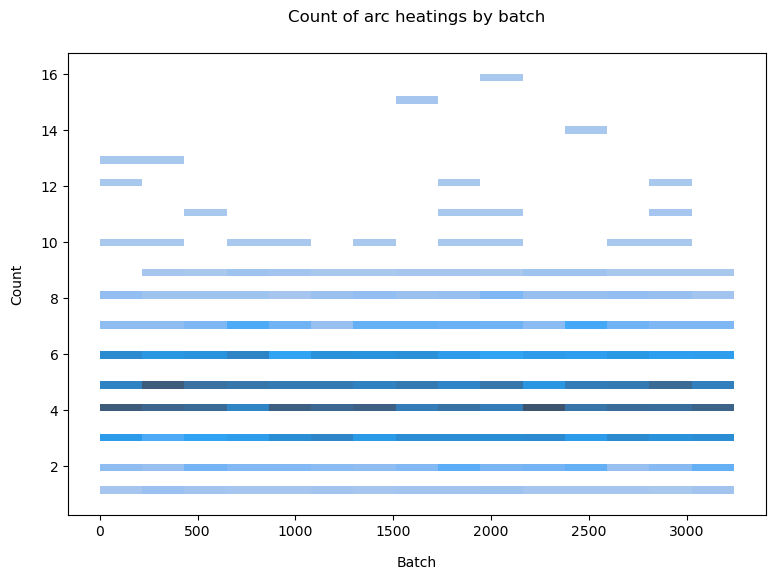

In [7]:
plt.figure(figsize=(9,6))
plt.title('Count of arc heatings by batch', y=1.05)
key_arc = pd.DataFrame(arc_new_df['key'].value_counts().sort_index())

sns.histplot(data=key_arc, x = 'key', y = 'count')
plt.xlabel('Batch', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.show()

We can see that there are more than three thousand batches. Several arc heatings occur in each batch (1-16 heatings and 4-6 in most cases).

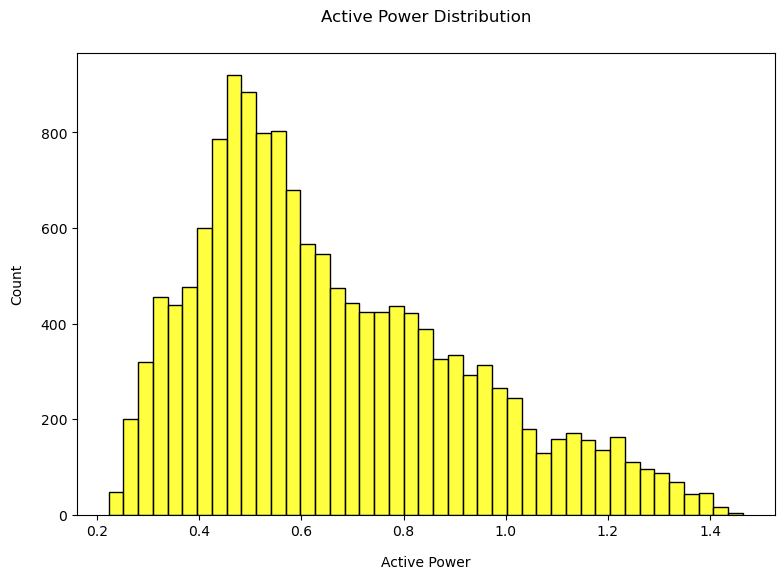

In [8]:
plt.figure(figsize=(9,6))
plt.title('Active Power Distribution', y=1.05)
sns.histplot(data=arc_new_df, x = 'active_power', color = 'yellow')
plt.xlabel('Active Power', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.show()

The distribution of active power is normal, with a slight assymetry to the right. 

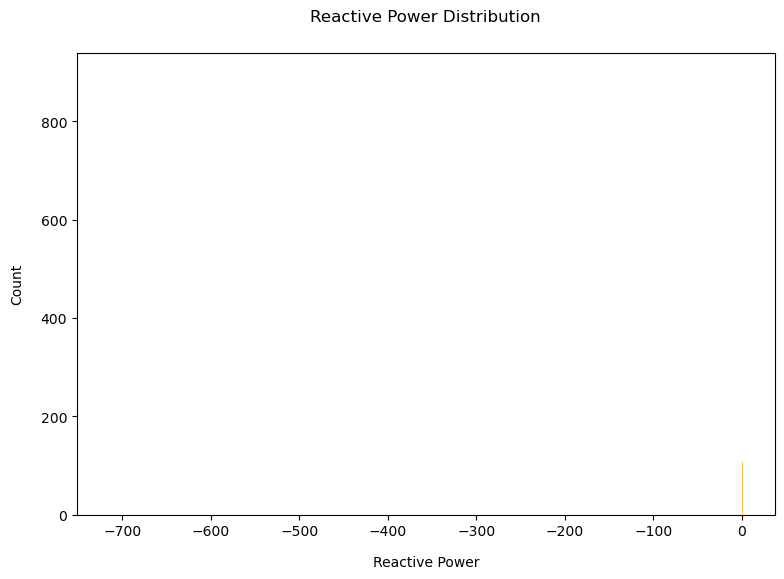

In [9]:
plt.figure(figsize=(9,6))
plt.title('Reactive Power Distribution', y=1.05)
sns.histplot(data=arc_new_df, x = 'reactive_power', color = 'orange')
plt.xlabel('Reactive Power', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.show()

The reactive power graph shows that the density is accumulated around zero and there are likely outliers in values between zero and about -800.

#### Descriptive Statistics

In [10]:
arc_new_df.describe()

,key,start_heat,end_heat,active_power,reactive_power
count,14876.000000,14876,14876,14876.000000,14876.000000
mean,1615.220422,2019-07-05 12:25:51.921081088,2019-07-05 12:28:43.592027392,0.662752,0.438986
min,1.000000,2019-05-03 11:02:14,2019-05-03 11:06:02,0.223120,-715.479924
25%,806.000000,2019-06-03 23:18:23.249999872,2019-06-03 23:21:35,0.467115,0.337175
50%,1617.000000,2019-07-03 01:31:26.500000,2019-07-03 01:35:13,0.599587,0.441639
75%,2429.000000,2019-08-07 22:52:20.750000128,2019-08-07 22:56:47,0.830070,0.608201
max,3241.000000,2019-09-06 17:24:54,2019-09-06 17:26:15,1.463773,1.270284
std,934.571502,NaN,NaN,0.258885,5.873485


The minimum value of the reactive power is -715.479924; this is probably the outlier we mentioned before.
We could just remove the outliers from this column, but in theory, active and reactive powers are interconnected, thus should be correlated. Therefore, we can do without one of them:

 
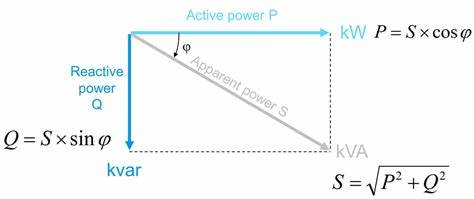                               

Let's check the correlation. Since we have not yet checked for all outliers, we will numerically calculate the correlation using Spearman's method, which is less sensitive to outliers:

In [11]:
arc_new_df['active_power'].corr(arc_new_df['reactive_power'], method = 'spearman')

0.9708786558173719

As expected, the correlation is almost one hundred percent (97%).

**Let's build graphs to visualize the correlation**:

In [12]:
# checking how many outliers there are in the interval [-800, 0)
print(arc_new_df.loc[arc_new_df['reactive_power'] < 0])

       key          start_heat            end_heat  active_power  \
9780  2116 2019-07-28 02:22:08 2019-07-28 02:23:57      0.705344   

      reactive_power  
9780     -715.479924  


In [13]:
# for the beauty of the graphs, we'll remove this super distant outlier
arc_new_df = arc_new_df.query('reactive_power > 0')

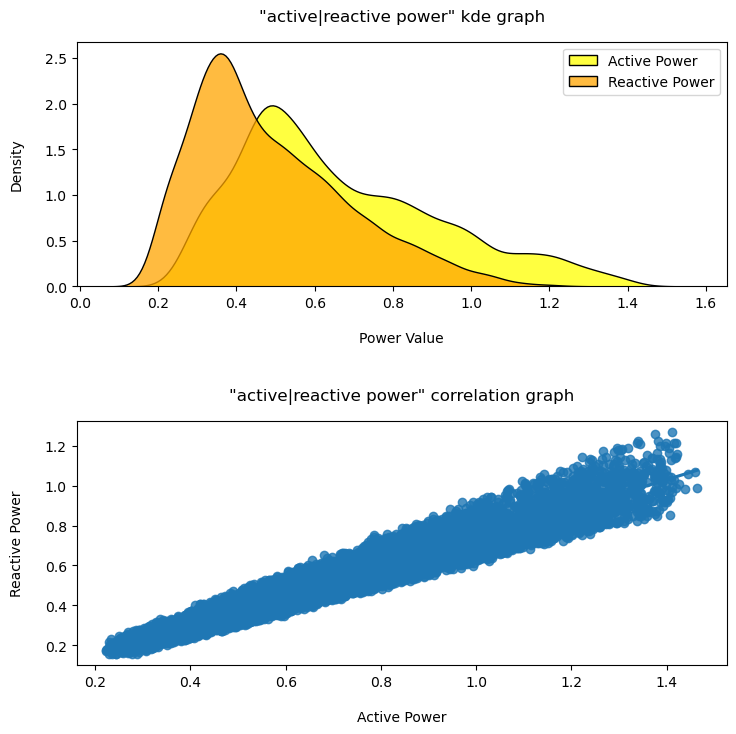

In [14]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

ax0.set_title('"active|reactive power" kde graph', y = 1.05)

sns.kdeplot(data=arc_new_df, x='active_power', multiple = 'stack', ax=ax0, color = 'yellow')
sns.kdeplot(data=arc_new_df, x = 'reactive_power', multiple = 'stack', ax=ax0, color = 'orange')

ax0.set_xlabel('Power Value', labelpad = 15)
ax0.set_ylabel('Density', labelpad = 15)
ax0.legend(loc='best', labels= ['Active Power','Reactive Power'])

ax1.set_title('"active|reactive power" correlation graph', y = 1.05)
sns.regplot(data=arc_new_df, x="active_power", y="reactive_power",ax=ax1 )
ax1.set_xlabel('Active Power', labelpad = 15)
ax1.set_ylabel('Reactive Power', labelpad = 15)

plt.tight_layout(pad = 3)

plt.show()

The graph shows a clear correlation of values. When active power increases, reactive power also increases.

We can remove one of these features. Let's remove the reactive power column:

In [15]:
arc_new_df = arc_new_df.drop('reactive_power', axis=1)

In [16]:
arc_new_df.head()

,key,start_heat,end_heat,active_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133


The heating start and end dates are not of much importance, but the process duration time can be relevant information. Let's create a column for the process duration values and remove the dates:

In [17]:
# creating the process duration column
arc_new_df['arc_heating_duration'] = arc_new_df['end_heat'] - arc_new_df['start_heat']

# removing the date columns
arc_new_df = arc_new_df.drop(['start_heat', 'end_heat'], axis=1)

In [18]:
arc_new_df.head()

,key,active_power,arc_heating_duration
0,1,0.305130,0 days 00:03:48
1,1,0.765658,0 days 00:03:05
2,1,0.580313,0 days 00:02:52
3,1,0.518496,0 days 00:06:05
4,1,0.867133,0 days 00:02:28


For convenience and to improve the training of the prediction model, let’s convert the format of the arc heating duration column from *timedelta64* to seconds (int64):

In [19]:
arc_new_df['arc_heating_duration'] = (arc_new_df['arc_heating_duration'] / np.timedelta64(1, 's')).astype('int64')

In [20]:
arc_new_df.head()

,key,active_power,arc_heating_duration
0,1,0.305130,228
1,1,0.765658,185
2,1,0.580313,172
3,1,0.518496,365
4,1,0.867133,148


Text(0, 0.5, 'Heating duration in seconds')

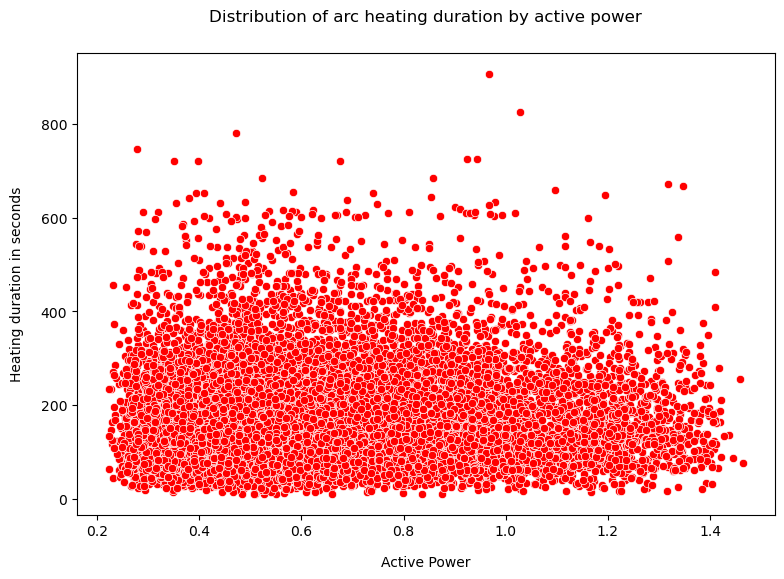

In [21]:
plt.figure(figsize=(9,6))
plt.title('Distribution of arc heating duration by active power', y=1.05)
sns.scatterplot(data=arc_new_df, y = 'arc_heating_duration', x = 'active_power', color = 'red')
plt.xlabel('Active Power', labelpad = 12)
plt.ylabel('Heating duration in seconds', labelpad = 12)

The graph shows that there is no correlation at all between active power and heating duration. Let's check the correlation numerically:

In [22]:
arc_new_df['active_power'].corr(arc_new_df['arc_heating_duration'])

0.010589562405799136

Let's analyze the distribution of active power visually:

<Axes: >

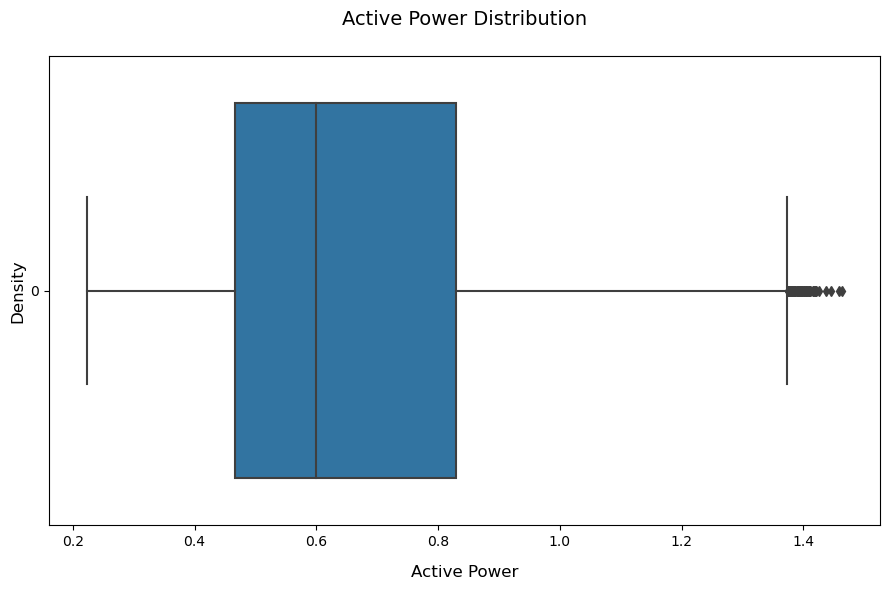

In [23]:
plt.figure(figsize=(9,6))
display(sns.boxplot(data=arc_new_df['active_power'], orient = 'h'))
plt.ylabel('Density', size = 12)
plt.xlabel('Active Power', labelpad=12, size=12)
plt.title('Active Power Distribution', y=1.05, size = 14)
plt.tight_layout()
plt.show()

In [24]:
# numerical description of the graph
arc_new_df['active_power'].describe()

count    14875.000000
mean         0.662749
std          0.258894
min          0.223120
25%          0.467115
50%          0.599578
75%          0.830135
max          1.463773
Name: active_power, dtype: float64

Although the graph shows values that appear to be outliers, we will not remove them because these are values that may actually occur during the process.

Let's analyze the distribution of arc heating duration visually:

<Axes: >

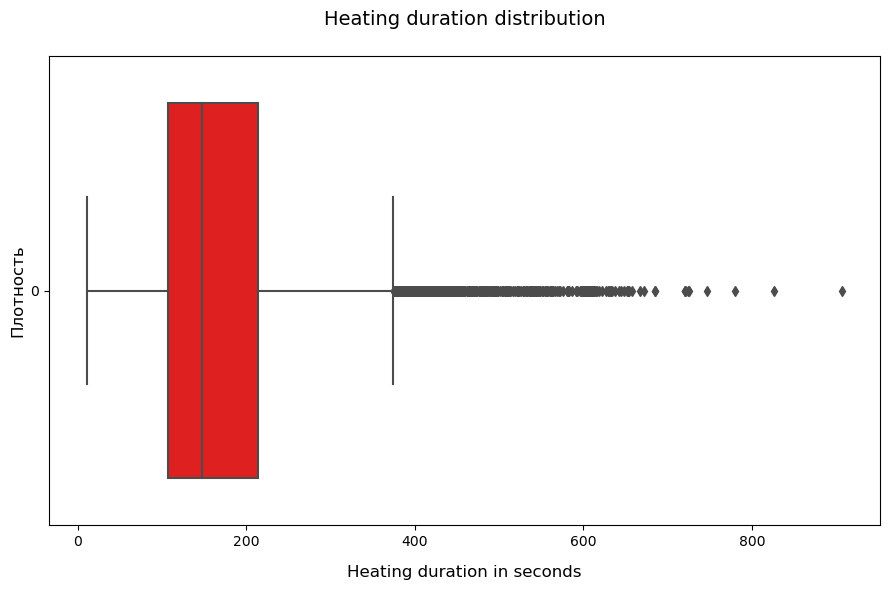

In [25]:
plt.figure(figsize=(9,6))
display(sns.boxplot(data=arc_new_df['arc_heating_duration'], orient = 'h', color = 'red'))
plt.ylabel('Плотность', size = 12)
plt.xlabel('Heating duration in seconds', labelpad=12, size = 12)
plt.title('Heating duration distribution', y=1.05, size = 14)
plt.tight_layout()
plt.show()

In [26]:
arc_new_df['arc_heating_duration'].describe()

count    14875.000000
mean       171.675160
std         98.188759
min         11.000000
25%        107.000000
50%        147.000000
75%        214.000000
max        907.000000
Name: arc_heating_duration, dtype: float64

In [27]:
print(arc_new_df.info())
print('')
print(arc_new_df.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 14875 entries, 0 to 14875
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14875 non-null  int64  
 1   active_power          14875 non-null  float64
 2   arc_heating_duration  14875 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 980.9 KB
None

   key  active_power  arc_heating_duration
0    1      0.305130                   228
1    1      0.765658                   185
2    1      0.580313                   172
3    1      0.518496                   365
4    1      0.867133                   148
5    2      0.381124                   137
6    2      0.261665                   338
7    2      0.710297                   126
8    2      0.786322                   210
9    3      1.101678                   280


#### Checking for duplicates

In [28]:
arc_new_df.duplicated().sum()

0

#### Checking for null values

In [29]:
arc_new_df.isna().sum()

key                     0
active_power            0
arc_heating_duration    0
dtype: int64

###  <font color='green'>Conclusion from electrode data:</font> 

During the analysis of electrode data, the following was carried out:
  - Column names have been changed for convenience.
  - The number of batches and the number of arc heatings per batch were analyzed.
  - Data distributions were analyzed and found to be normal.
  - Columns with start and end dates of heating were excluded as they were considered to be of little significance.
  - The reactive power column was excluded because it was correlated with active power.
  - A column with the duration of the arc heating in seconds has been created.
  - The presence of NaNs and duplicates was checked with negative results.

###  <font color='violet'>Study of data on the supply of bulk materials (volume) (bulk_new_df)</font>

In [30]:
bulk_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.3 KB


There are a lot of gaps in many columns. It is possible that some materials are supplied only occasionally.

#### Let's rename the column names for convenience

In [31]:
i = 1
cols = []

while i <= (len(bulk_new_df.columns)-1):
    cols.append('bulk_' + str(i))
    i=i+1
    
cols.insert(0, 'key')
bulk_new_df.columns = cols   

In [32]:
bulk_new_df.head(40)

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


#### Filling in the NaNs and changing the data type

Bulks represent the volume of the supplied material. Thus, NaNs can be understood as the absence of material supply and can be replaced with zeros to make future operations easier. We can also change the data type "float" to "integer", because the values do not contain decimals.

In [33]:
bulk_new_df = bulk_new_df.fillna(0)
bulk_new_df = bulk_new_df.astype('int64')

In [34]:
bulk_new_df.head(35)

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0,0,0,43,0,0,0,0,0,0,0,206,0,150,154
1,2,0,0,0,73,0,0,0,0,0,0,0,206,0,149,154
2,3,0,0,0,34,0,0,0,0,0,0,0,205,0,152,153
3,4,0,0,0,81,0,0,0,0,0,0,0,207,0,153,154
4,5,0,0,0,78,0,0,0,0,0,0,0,203,0,151,152
5,6,0,0,0,117,0,0,0,0,0,0,0,204,0,201,154
6,7,0,0,0,117,0,0,0,0,0,0,0,204,0,152,154
7,8,0,0,0,99,0,0,0,0,0,0,0,410,0,252,153
8,9,0,0,0,117,0,0,0,0,0,0,0,107,0,99,203
9,10,0,0,0,0,0,0,0,0,0,0,0,203,0,102,204


Let's see how many non-zero values there are in each volume:

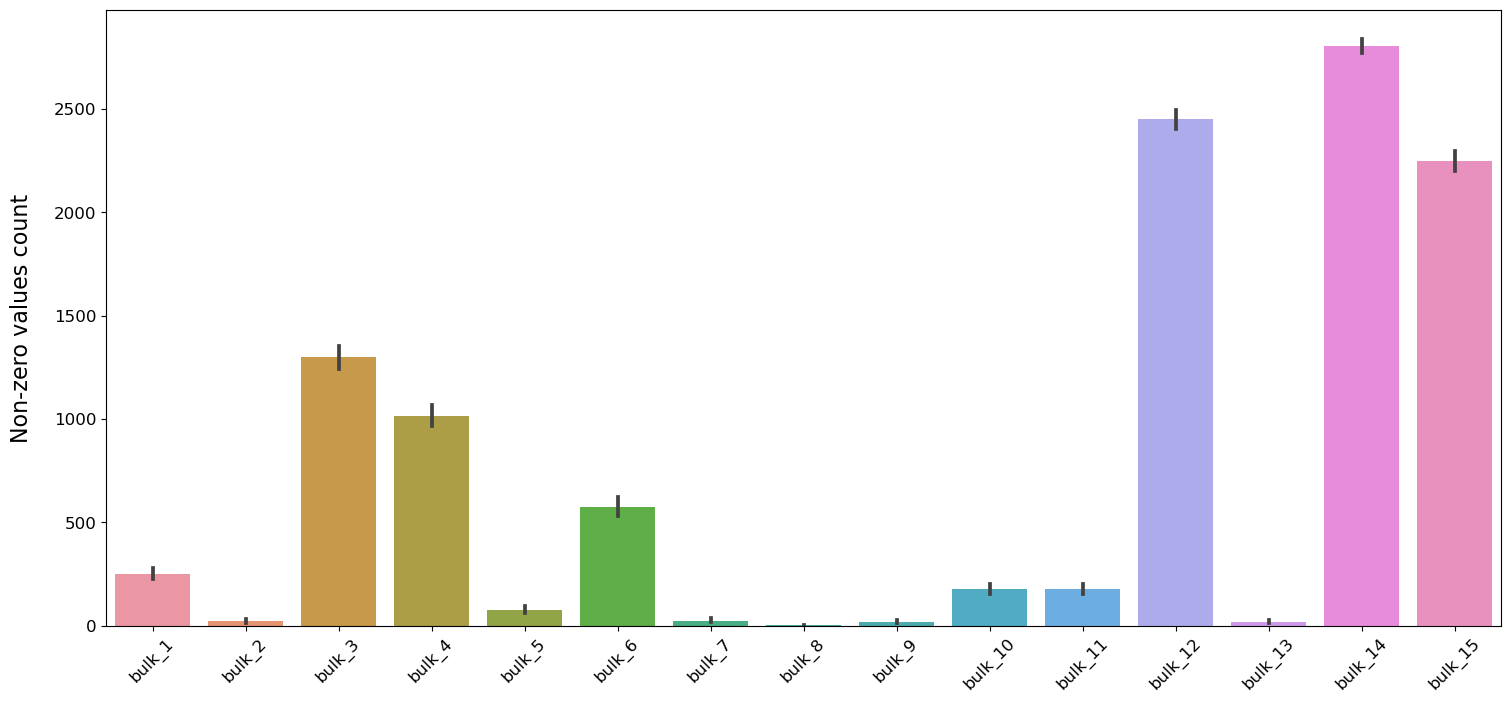

In [35]:
plt.figure(figsize=(18,8))
sns.barplot(data=bulk_new_df.drop('key', axis=1), estimator = np.count_nonzero)
plt.ylabel('Non-zero values count', size = 16, labelpad = 15)
plt.tick_params(axis='x', labelrotation=45, labelsize = 'large')
plt.tick_params(axis='y', labelsize = 'large')
plt.show()

Several bulks consist mostly of null values. We can spare them, because null values don't have an effect on our predictive model. Let's remove the bulks with the greatest amount of null values:

In [36]:
bulk_new_df = bulk_new_df.drop(['bulk_2', 'bulk_7', 'bulk_8', 'bulk_9', 'bulk_13'], axis = 1)

Checking if there is a correlation among the bulks:

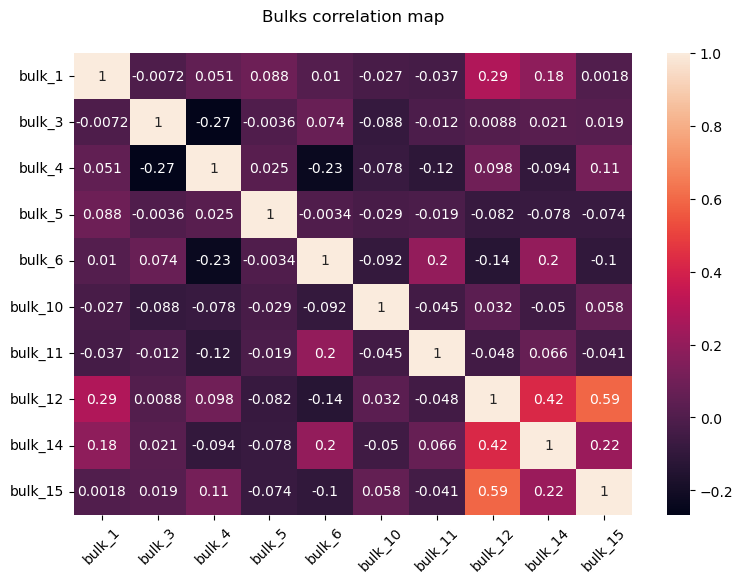

In [37]:
plt.figure(figsize=(9,6))
plt.title('Bulks correlation map', y=1.05)
sns.heatmap(data=bulk_new_df.drop('key',axis=1).corr() , annot=True)
plt.tick_params(axis='x', labelrotation=45)
plt.show()

There is a slight correlation among Bulk_12, Bulk_14, Bulk_15, but not enough to take this into account.

Lastly, let's check the duplicates:

In [38]:
bulk_new_df.duplicated().sum()

0

###  <font color='green'>Conclusion from data on the supply of bulk materials (volume):</font> 

- During the analysis of data on the supply of bulk materials (volume), the following was carried out:
     - Column names have been changed for convenience.
     - The number of materials supplied for each batch was analyzed.
     - Gaps were filled with zeros, indicating no material was supplied.
     - The bulks data type has been changed from float to int.
     - Columns with the most zeros were excluded because they were considered irrelevant.
     - Correlation among the bulks was checked, with negative results.
     - The presence of duplicates was checked, with negative results.

### <font color='violet'>Study of data on the supply of bulk materials (time) (bulk_time_new_df)</font>

In [39]:
bulk_time_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.3 KB


As it should be, non-zero values correspond to the ones in bulk_new_df.

#### Changing the columns names:

In [40]:
i = 1
cols = []

while i <= (len(bulk_time_new_df.columns)-1):
    cols.append('bulk_time_' + str(i))
    i=i+1
    
cols.insert(0, 'key')
bulk_time_new_df.columns = cols

#### Let's remove the bulks that we considered unnecessary:

In [41]:
bulk_time_new_df = bulk_time_new_df[['key',
                                     'bulk_time_3', 
                                     'bulk_time_4', 
                                     'bulk_time_6', 
                                     'bulk_time_12', 
                                     'bulk_time_14',
                                     'bulk_time_15']]

#### Filling the NaNs in with zero values:

In [42]:
bulk_time_new_df = bulk_time_new_df.fillna(0)

#### Overview:

In [43]:
bulk_time_new_df.head(10)

,key,bulk_time_3,bulk_time_4,bulk_time_6,bulk_time_12,bulk_time_14,bulk_time_15
0,1,0,2019-05-03 11:28:48,0,2019-05-03 11:24:31,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,0,2019-05-03 11:36:50,0,2019-05-03 11:53:30,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,0,2019-05-03 12:32:39,0,2019-05-03 12:27:13,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,0,2019-05-03 12:43:22,0,2019-05-03 12:58:00,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,0,2019-05-03 13:30:47,0,2019-05-03 13:30:47,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,0,2019-05-03 13:57:27,0,2019-05-03 13:48:52,2019-05-03 14:09:42,2019-05-03 14:03:15
6,7,0,2019-05-03 14:18:58,0,2019-05-03 14:41:26,2019-05-03 14:30:50,2019-05-03 14:27:16
7,8,0,2019-05-03 15:17:58,0,2019-05-03 15:17:58,2019-05-03 15:13:18,2019-05-03 15:05:33
8,9,0,2019-05-03 16:03:08,0,2019-05-03 16:03:08,2019-05-03 16:00:16,2019-05-03 15:52:39
9,10,0,0,0,2019-05-03 16:38:11,2019-05-03 16:34:24,2019-05-03 16:29:56


In [44]:
bulk_all = bulk_time_new_df.merge(bulk_new_df, on='key', how='outer')
display(bulk_all)

,key,bulk_time_3,bulk_time_4,bulk_time_6,bulk_time_12,bulk_time_14,bulk_time_15,bulk_1,bulk_3,bulk_4,bulk_5,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15
0,1,0,2019-05-03 11:28:48,0,2019-05-03 11:24:31,2019-05-03 11:14:50,2019-05-03 11:10:43,0,0,43,0,0,0,0,206,150,154
1,2,0,2019-05-03 11:36:50,0,2019-05-03 11:53:30,2019-05-03 11:48:37,2019-05-03 11:44:39,0,0,73,0,0,0,0,206,149,154
2,3,0,2019-05-03 12:32:39,0,2019-05-03 12:27:13,2019-05-03 12:21:01,2019-05-03 12:16:16,0,0,34,0,0,0,0,205,152,153
3,4,0,2019-05-03 12:43:22,0,2019-05-03 12:58:00,2019-05-03 12:51:11,2019-05-03 12:46:36,0,0,81,0,0,0,0,207,153,154
4,5,0,2019-05-03 13:30:47,0,2019-05-03 13:30:47,2019-05-03 13:34:12,2019-05-03 13:30:47,0,0,78,0,0,0,0,203,151,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,2019-09-06 11:54:15,0,0,2019-09-06 11:49:45,2019-09-06 11:45:22,2019-09-06 11:40:06,0,170,0,0,0,0,0,252,130,206
3125,3238,2019-09-06 12:26:52,0,0,2019-09-06 12:18:35,2019-09-06 12:31:49,2019-09-06 12:26:52,0,126,0,0,0,0,0,254,108,106
3126,3239,0,0,2019-09-06 15:06:00,2019-09-06 15:01:44,2019-09-06 14:58:15,2019-09-06 14:48:06,0,0,0,0,114,0,0,158,270,88
3127,3240,0,0,2019-09-06 16:24:28,0,2019-09-06 16:07:29,2019-09-06 16:01:34,0,0,0,0,26,0,0,0,192,54


###  <font color='green'>Conclusion from bulk material supply data (time):</font> 

Actually, this table is intended to check that there are no discrepancies in the data. So we didn't have to make any changes here. The presence of values on the time of the materials supply (bulk_time_new_df) coincides with the fact that the materials were actually supplied (bulk_new_df).

### <font color='violet'>Study of data on alloy gas purging (gas_new_df)</font>

In [45]:
gas_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


#### Let's rename the column names for convenience

In [46]:
gas_new_df.columns = ['key', 'gas_1']

#### Let's see what the data looks like

In [47]:
gas_new_df.head()

,key,gas_1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Text(0, 0.5, 'Gas Volume')

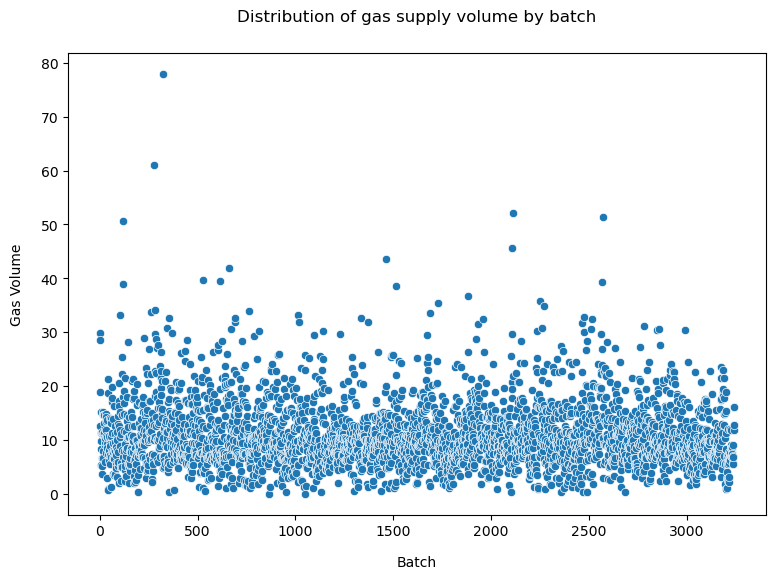

In [48]:
plt.figure(figsize=(9,6))
plt.title('Distribution of gas supply volume by batch', y=1.05)
sns.scatterplot(data=gas_new_df, x = 'key', y = 'gas_1')
plt.xlabel('Batch', labelpad = 12)
plt.ylabel('Gas Volume', labelpad = 12)

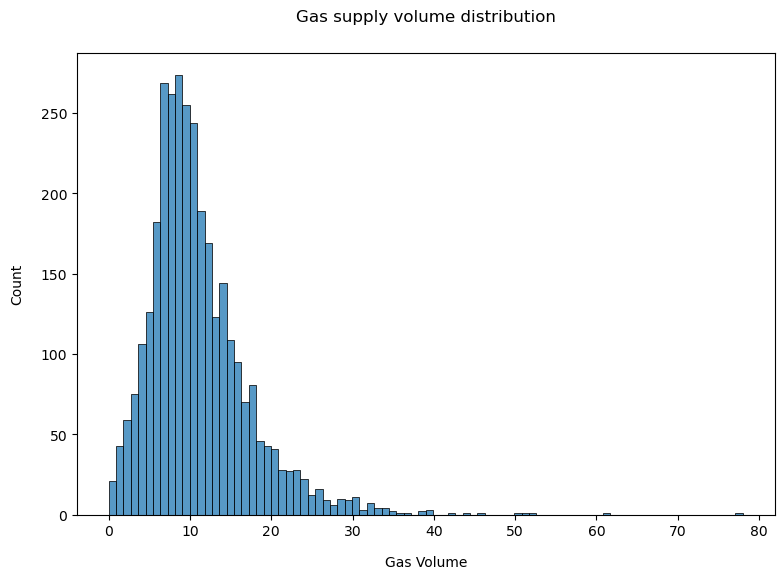

In [49]:
plt.figure(figsize=(9,6))
plt.title('Gas supply volume distribution', y=1.05)
sns.histplot(data=gas_new_df, x = 'gas_1')
plt.xlabel('Gas Volume', labelpad = 12)
plt.ylabel('Count', labelpad = 12)
plt.show()

The values are reasonable. No negative values.

In [50]:
gas_new_df.shape

(3239, 2)

#### Let's make sure that there are neither NaNs nor duplicates

In [51]:
print(gas_new_df.isna().sum())
print('')
print('Amount of duplicates:', gas_new_df.duplicated().sum())

key      0
gas_1    0
dtype: int64

Amount of duplicates: 0


###  <font color='green'>Conclusion from data on gas purging of the alloy:</font> 

- During the analysis of data on gas purging of the alloy, the following was carried out:
     - Column names have been changed for convenience.
     - Gas supply distribution was analyzed; There were no impossible values.
     - The presence of duplicates and NaNs was checked, with negative results.

### <font color='violet'>Study of data on temperature measurement (temp_new_df)</font>

In [52]:
temp_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int64         
 1   Время замера  18092 non-null  datetime64[ns]
 2   Температура   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


#### Let's rename the column names for convenience

In [53]:
temp_new_df.columns = ['key', 'm_time', 'temp']

#### Let's see what the data looks like

Let's compare the count of temperature measurements with the count of arc heatings:

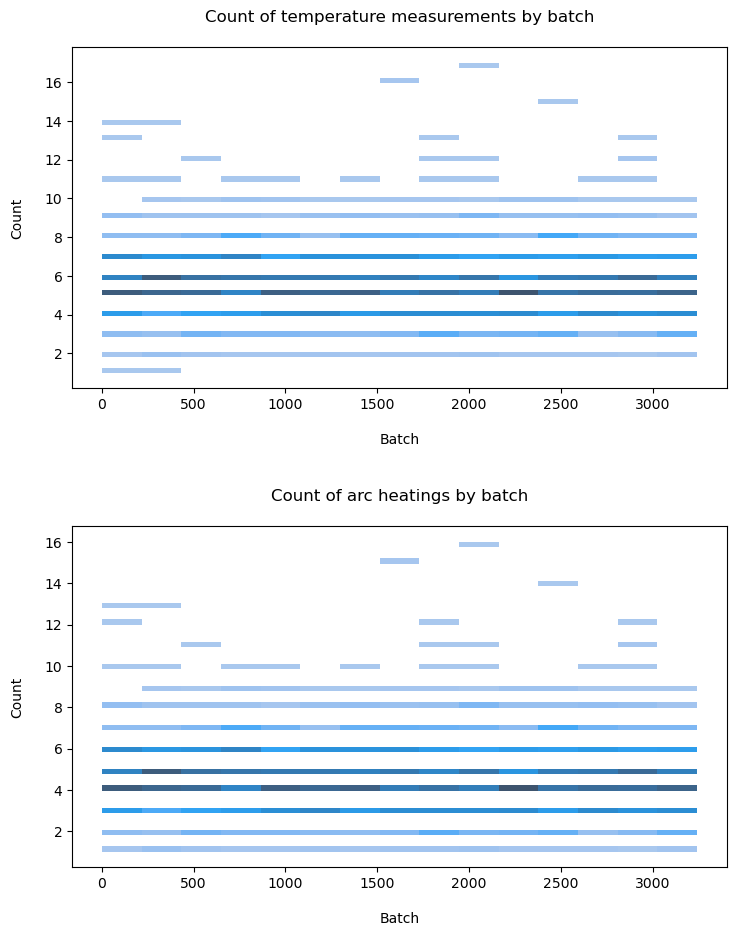

In [54]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

ax0.set_title('Count of temperature measurements by batch', y = 1.05)
key_temp = pd.DataFrame(temp_new_df['key'].value_counts().sort_index())
sns.histplot(data=key_temp, x='key', y = 'count', ax=ax0)
ax0.set_xlabel('Batch', labelpad = 15)
ax0.set_ylabel('Count', labelpad = 15)


ax1.set_title('Count of arc heatings by batch', y = 1.05)
key_arc = pd.DataFrame(arc_new_df['key'].value_counts().sort_index())
sns.histplot(key_arc, x = 'key', y = 'count', ax=ax1)
ax1.set_xlabel('Batch', labelpad = 15)
ax1.set_ylabel('Count', labelpad = 15)

plt.tight_layout(pad = 3)

plt.show()

Each batch begins with a temperature measurement, so there should be one more temperature measurement than arc heatings per batch. Therefore, we see that on average, there are 4-6 arc heatings and 5-7 temperature measurements per batch. If the temperature measurement occurred only once, this can only mean that the composition was ideal and there was no need to change it so there was no heating. What’s strange is that these “ideal batches” occurred only within the first 500 batches (approximately).

Let's remove the batches where the temperature was measured only once; they can affect the model:

In [55]:
# table for calculating temperature measurements per batch
temp_count = pd.pivot_table(temp_new_df, index='key', values='temp', aggfunc='count')
temp_count

,temp
key,
1,6
2,5
3,6
4,5
5,5
...,...
3237,1
3238,1
3239,1


In [56]:
# batches from this table where the measurement was performed only once
count_1 = temp_count.loc[temp_count['temp'] == 1]
count_1

,temp
key,
195,1
279,1
2500,1
2501,1
2502,1
...,...
3237,1
3238,1
3239,1


In [57]:
# saving the batches where the measurement was performed only once, in the form of a list, in the keys_to_delete variable
keys_to_delete = count_1.index.tolist()
keys_to_delete

[195,
 279,
 2500,
 2501,
 2502,
 2503,
 2504,
 2505,
 2506,
 2507,
 2508,
 2509,
 2510,
 2511,
 2512,
 2513,
 2514,
 2515,
 2516,
 2517,
 2518,
 2519,
 2520,
 2521,
 2522,
 2523,
 2524,
 2525,
 2526,
 2527,
 2528,
 2529,
 2530,
 2531,
 2532,
 2533,
 2534,
 2535,
 2536,
 2537,
 2538,
 2539,
 2540,
 2541,
 2542,
 2543,
 2544,
 2545,
 2546,
 2547,
 2548,
 2549,
 2550,
 2551,
 2552,
 2553,
 2554,
 2555,
 2556,
 2557,
 2558,
 2559,
 2560,
 2561,
 2562,
 2563,
 2564,
 2565,
 2566,
 2567,
 2568,
 2569,
 2570,
 2571,
 2572,
 2573,
 2574,
 2575,
 2576,
 2577,
 2578,
 2579,
 2580,
 2581,
 2582,
 2583,
 2584,
 2585,
 2586,
 2587,
 2588,
 2589,
 2590,
 2591,
 2592,
 2593,
 2594,
 2595,
 2596,
 2597,
 2598,
 2599,
 2600,
 2601,
 2602,
 2603,
 2604,
 2605,
 2606,
 2607,
 2608,
 2609,
 2610,
 2611,
 2612,
 2613,
 2614,
 2615,
 2616,
 2617,
 2618,
 2619,
 2620,
 2621,
 2622,
 2623,
 2624,
 2625,
 2626,
 2627,
 2628,
 2629,
 2630,
 2631,
 2632,
 2633,
 2634,
 2635,
 2636,
 2637,
 2638,
 2639,
 2640,
 

In [58]:
# checking which indexes correspond to the batches that need to be deleted
index_to_delete = temp_new_df.loc[temp_new_df['key'].isin(keys_to_delete)].index.tolist()
index_to_delete

[1105,
 1549,
 13926,
 13927,
 13928,
 13929,
 13930,
 13931,
 13932,
 13933,
 13934,
 13935,
 13936,
 13937,
 13938,
 13939,
 13940,
 13941,
 13942,
 13943,
 13944,
 13945,
 13946,
 13947,
 13948,
 13949,
 13950,
 13951,
 13952,
 13953,
 13954,
 13955,
 13956,
 13957,
 13958,
 13959,
 13960,
 13961,
 13962,
 13963,
 13964,
 13965,
 13966,
 13967,
 13968,
 13969,
 13970,
 13971,
 13972,
 13973,
 13974,
 13975,
 13976,
 13977,
 13978,
 13979,
 13980,
 13981,
 13982,
 13983,
 13984,
 13985,
 13986,
 13987,
 13988,
 13989,
 13990,
 13991,
 13992,
 13993,
 13994,
 13995,
 13996,
 13997,
 13998,
 13999,
 14000,
 14001,
 14002,
 14003,
 14004,
 14005,
 14006,
 14007,
 14008,
 14009,
 14010,
 14011,
 14012,
 14013,
 14014,
 14015,
 14016,
 14017,
 14018,
 14019,
 14020,
 14021,
 14022,
 14023,
 14024,
 14025,
 14026,
 14027,
 14028,
 14029,
 14030,
 14031,
 14032,
 14033,
 14034,
 14035,
 14036,
 14037,
 14038,
 14039,
 14040,
 14041,
 14042,
 14043,
 14044,
 14045,
 14046,
 14047,
 14048,
 1

In [59]:
# deleting the rows
temp_new_df = temp_new_df.drop(index_to_delete)

Text(0, 0.5, 'Temperature ºC')

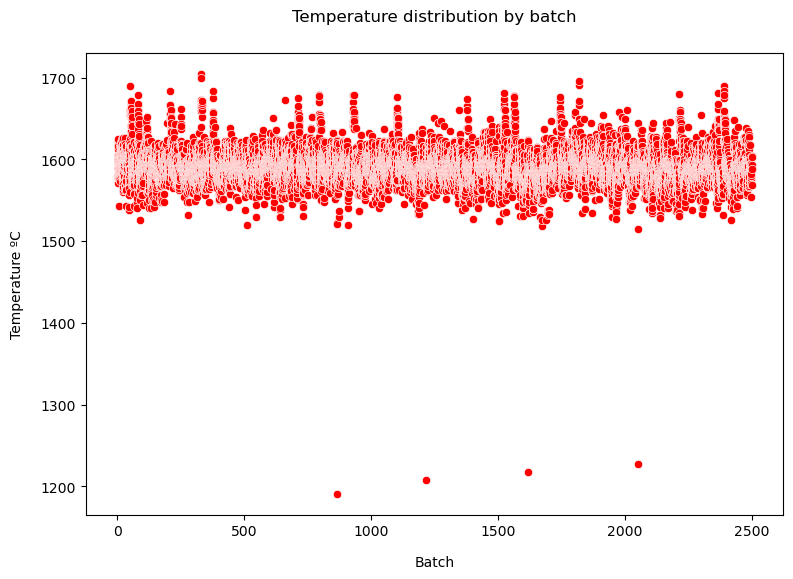

In [60]:
plt.figure(figsize=(9,6))
plt.title('Temperature distribution by batch', y=1.05)
sns.scatterplot(data=temp_new_df, x = 'key', y = 'temp', color = 'red')
plt.xlabel('Batch', labelpad = 12)
plt.ylabel('Temperature ºC', labelpad = 12)

Text(0, 0.5, 'Count')

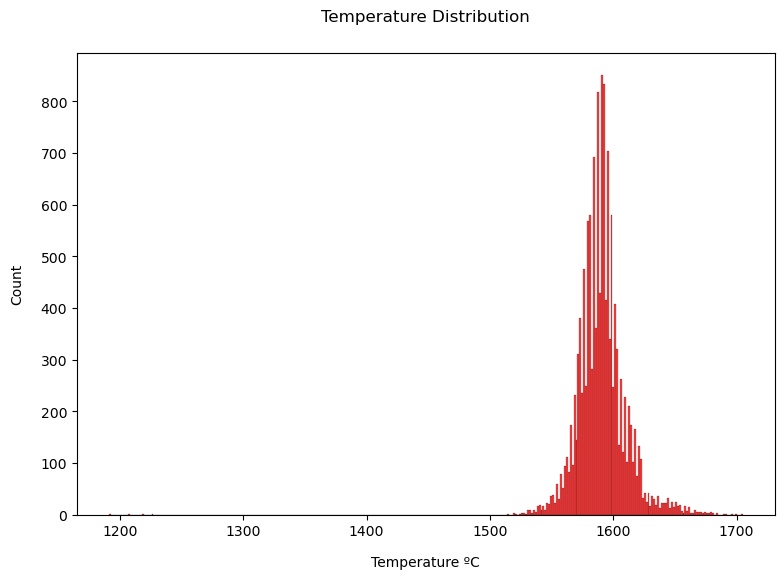

In [61]:
plt.figure(figsize=(9,6))
plt.title('Temperature Distribution', y=1.05)
sns.histplot(data=temp_new_df['temp'], color = 'red')
plt.xlabel('Temperature ºC', labelpad = 12)
plt.ylabel('Count', labelpad = 12)

We can see that there are several values that are extremely far from the rest. The alloying temperature of steel is 1400-1600 degrees. Therefore, we will eliminate these extreme values.

#### Removing the outliers

In [62]:
temp_new_df = temp_new_df.query('temp >= 1400')

#### Cheking for duplicates

In [63]:
temp_new_df.duplicated().sum()

0

#### Checking for NaNs

In [64]:
temp_new_df.isna().sum()

key       0
m_time    0
temp      0
dtype: int64

3427 NaNs in the temperature column. For us, it is only important if there are NaNs in the first temperature value (it will be one of the features) and the last temperature value (it will be the target) of each unique batch. Let's see if there are NaNs in them:

In [65]:
# creating a table with the first and last temperature of each unique batch
first_last = pd.pivot_table(temp_new_df, index = 'key', values='temp', aggfunc=['first', 'last'])
first_last.columns = ['temp_first', 'temp_last'] 
display(first_last) # displaying the table on the screen
print(first_last.isna().sum()) # checking for NaNs 
print('Shape:', first_last.shape)

,temp_first,temp_last
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0
...,...,...
2495,1570.0,1591.0
2496,1554.0,1591.0
2497,1571.0,1589.0


temp_first    0
temp_last     0
dtype: int64
Shape: (2475, 2)


3241 rows that correspond to each individual batch and not a single NaN. So we can simply remove the rows containing the NaNs: they are only present in intermediate temperature measurements.

#### From now on, the table *first_last* is our table regarding temperature; Let's visualize its data

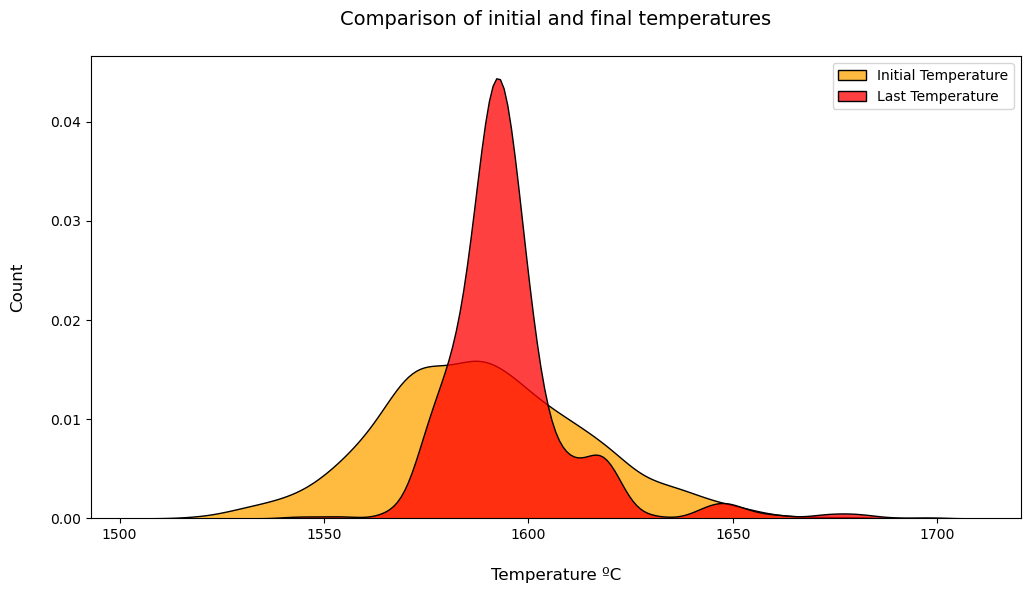

In [66]:
plt.figure(figsize=(12, 6))

plt.title('Comparison of initial and final temperatures', size = 14, y = 1.05)

sns.kdeplot(first_last, x = 'temp_first', label='Initial Temperature', color = 'orange', multiple = 'stack')
sns.kdeplot(first_last, x = 'temp_last', label = 'Last Temperature', color = 'red', multiple = 'stack')

plt.legend(loc='upper right', labels= ['Initial Temperature','Last Temperature'])

plt.xlabel('Temperature ºC', fontsize=12, labelpad = 18)
plt.ylabel('Count', fontsize=12, labelpad=18)

plt.show()

We can see that in many cases the initial temperature is higher than the final temperature (in the ranges of 1500-1575 and 1605-1640 degrees, approximately). But on average, the final one is higher than the initial one.

In [67]:
first_last.shape

(2475, 2)

###  <font color='green'>Conclusion on temperature measurement results:</font> 

- During the analysis of data on the temperature measurement results, the following was carried out:
     - Column names have been changed for convenience.
     - Temperature measurements count per batch was compared with arc heatings count per batch.
     - Batches in which the temperature was measured only once were eliminated.
     - Temperature distribution was analyzed.
     - A new dataframe has been created, containing the initial and last temperatures.
     - The distribution of initial and final temperatures was analyzed.
     - The presence of duplicates and NaNs was checked, with negative results.
    

### <font color='violet'>Study of data on wire materiales (volume) (wire_new_df)</font>

In [68]:
wire_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


#### Changing column names for convenience

In [69]:
i = 1
cols = []

while i <= (len(wire_new_df.columns)-1):
    cols.append('wire_' + str(i))
    i=i+1
    
cols.insert(0, 'key')
wire_new_df.columns = cols

In [70]:
wire_new_df.head(10)

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 #### Checking for NaNs

In [71]:
wire_new_df.isna().sum()

key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64

Too many NaNs. Let's fill them in with zeros, since they represent the absence of the wire material:

In [72]:
wire_new_df = wire_new_df.fillna(0)

#### Checking for duplicates

In [73]:
wire_new_df.duplicated().sum()

0

#### Let's have a look at the data:

In [74]:
wire_new_df.head(10)

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,99.109917,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,98.061600,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,155.282394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,113.393279,9.143681,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,81.244796,12.376000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


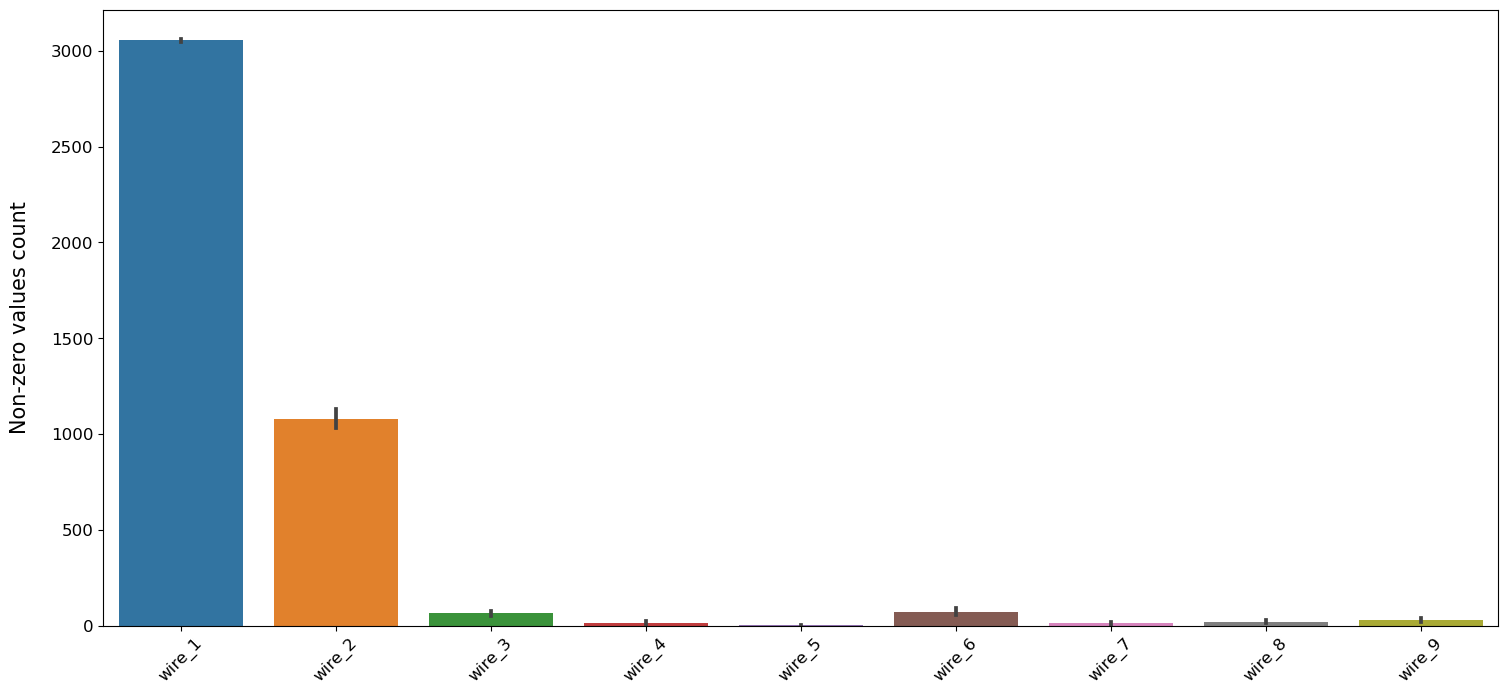

In [75]:
plt.figure(figsize=(18,8))
sns.barplot(data=wire_new_df.drop('key', axis=1), estimator = np.count_nonzero)
plt.ylabel('Non-zero values count', size = 15, labelpad = 15)
plt.tick_params(axis='x', labelrotation=45, labelsize = 'large')
plt.tick_params(axis='y', labelsize = 'large')
plt.show()

Most of the wire materials volume supply values equal zero, except wire_1 and wire_2. Let's keep just these two: 

In [76]:
wire_new_df = wire_new_df[['key','wire_1', 'wire_2']]

Let's check wire_1 and wire_2 distribution:

Text(0, 0.5, 'Density')

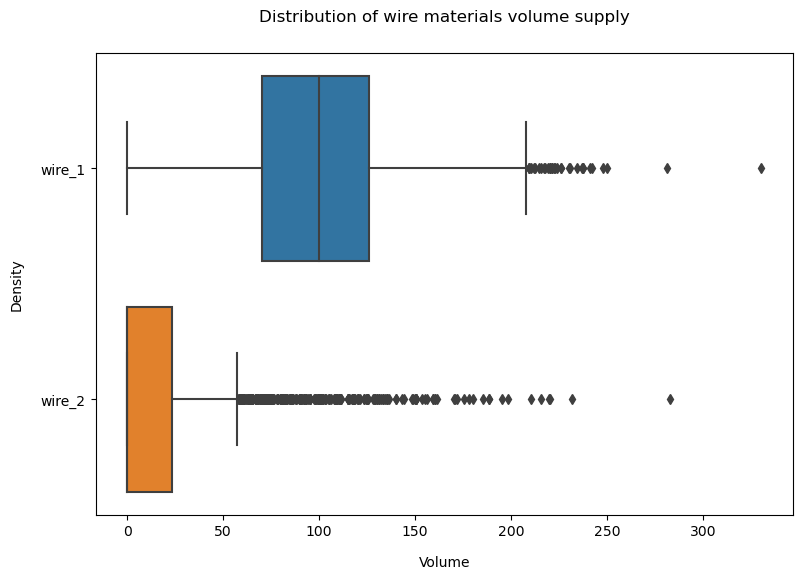

In [77]:
plt.figure(figsize=(9,6))
plt.title('Distribution of wire materials volume supply', y=1.05)
sns.boxplot(data=wire_new_df[['wire_1','wire_2']], orient = 'h')
plt.xlabel('Volume', labelpad = 12)
plt.ylabel('Density', labelpad = 12)

No negative values.

#### Let's check the correlation among the wire materials:

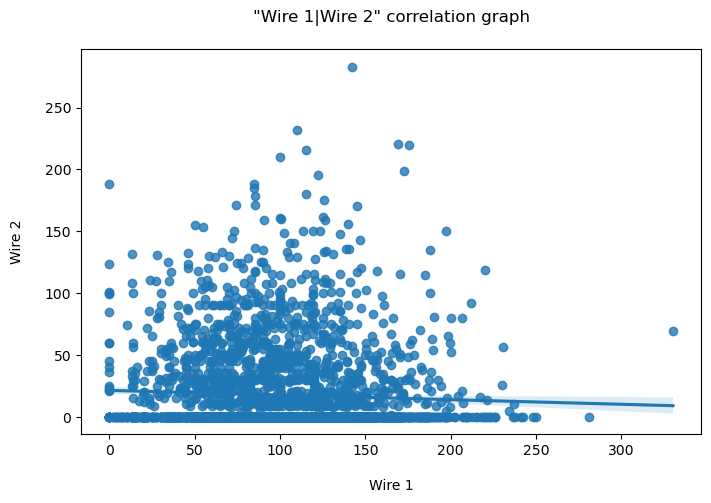

In [78]:
plt.figure(figsize=(8,5))
plt.title('"Wire 1|Wire 2" correlation graph', y = 1.05)
sns.regplot(data=wire_new_df, x = 'wire_1' , y = 'wire_2')
plt.xlabel('Wire 1', labelpad = 15)
plt.ylabel('Wire 2', labelpad = 15)
plt.show()

In [79]:
wire_new_df['wire_1'].corr(wire_new_df['wire_2'])

-0.04782425286516035

No correlation.

#### Concluding shape:

In [80]:
wire_new_df.shape

(3081, 3)

###  <font color='green'>Conclusion from data on wire materials (volume):</font> 

- During the analysis of data on wire materials (volume), the following was carried out:
     - Column names have been changed for convenience.
     - NaNs were filled with zeros, indicating no material was supplied.
     - Columns with mostly zero values were excluded because they were considered irrelevant.
     - Correlation among wire materials was checked, with negative results.
     - The presence of duplicates was checked, with negative results.

### <font color='violet'>Study of data on wire materiales (time) (wire_time_new_df) </font>

In [81]:
wire_time_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


Just like it's supposed to be, the null values correspond to the ones in wire_new_df.

Changing the column names:

In [82]:
i = 1
cols = []

while i <= (len(wire_time_new_df.columns)-1):
    cols.append('wire_time_' + str(i))
    i=i+1
    
cols.insert(0, 'key')
wire_time_new_df.columns = cols

Removing the wire materials we previously considered unnecessary:

In [83]:
wire_time_new_df = wire_time_new_df[['key','wire_time_1', 'wire_time_2']]

In [84]:
wire_time_new_df = wire_time_new_df.fillna(0)

#### Overview:

In [85]:
wire_all = wire_time_new_df.merge(wire_new_df, on='key', how ='outer')
display(wire_all)

,key,wire_time_1,wire_time_2,wire_1,wire_2
0,1,2019-05-03 11:06:19,0,60.059998,0.00000
1,2,2019-05-03 11:36:50,0,96.052315,0.00000
2,3,2019-05-03 12:11:46,0,91.160157,0.00000
3,4,2019-05-03 12:43:22,0,89.063515,0.00000
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,89.238236,9.11456
...,...,...,...,...,...
3076,3237,2019-09-06 11:33:38,0,38.088959,0.00000
3077,3238,2019-09-06 12:18:35,0,56.128799,0.00000
3078,3239,2019-09-06 14:36:11,0,143.357761,0.00000
3079,3240,2019-09-06 15:33:55,0,34.070400,0.00000


In [86]:
print(wire_all[wire_all['wire_time_2'] != 0].count() == wire_all[wire_all['wire_2'] != 0].count())
print(wire_all[wire_all['wire_time_1'] != 0].count() == wire_all[wire_all['wire_1'] != 0].count())

key            True
wire_time_1    True
wire_time_2    True
wire_1         True
wire_2         True
dtype: bool
key            True
wire_time_1    True
wire_time_2    True
wire_1         True
wire_2         True
dtype: bool


The data coincides.

###  <font color='green'>Conclusion on wire materials data (time):</font> 

Actually, this table is intended to check that there are no discrepancies in the data. So we didn't have to make any changes here. The presence of values on the time of the wire materials supply (wire_time_new_df) coincides with the fact that the wire materials were actually supplied (wire_new_df).

## <font color='blue'>Step 3/8: Data merging</font>

Since we only left the first and last temperatures of each batch, we need to somehow transform the values of active power and arc heating duration, because this table still has intermediate values. To present data on the active power and duration of arc heating per batch, we can add the total heating time and the average active power value per batch.

In [87]:
power_mean = pd.pivot_table(arc_new_df, index='key', values='active_power', aggfunc=['mean'])
power_mean.columns = ['active_power_mean']
power_mean

,active_power_mean
key,
1,0.607346
2,0.534852
3,0.812728
4,0.676622
5,0.563238
...,...
3237,0.508374
3238,0.458274
3239,0.606001


And so with the heating duration:

In [88]:
heating_sum = pd.pivot_table(arc_new_df, index='key', values='arc_heating_duration', aggfunc=['sum'])
heating_sum.columns = ['arc_heating_duration_sum']
heating_sum

,arc_heating_duration_sum
key,
1,1098
2,811
3,655
4,741
5,869
...,...
3237,909
3238,546
3239,1216


The most important table is the one with temperature data, since it contains the column that we will use as a target. We will merge all other tables into one single table (rest_data) via *outer* so that all their data is saved, and then we will join it to the table with temperature via *left* so that only those data whose keys match the keys in the table with temperature remain. We will save the final table in the whole_data variable.

In [89]:
rest_data = power_mean\
.merge(bulk_new_df, on='key', how='outer')\
.merge(gas_new_df, on='key', how='outer')\
.merge(wire_new_df, on='key', how='outer')\
.merge(heating_sum, on='key', how='outer')

whole_data = first_last.merge(rest_data, on='key', how='left')

In [90]:
whole_data

,key,temp_first,temp_last,active_power_mean,bulk_1,bulk_3,bulk_4,bulk_5,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15,gas_1,wire_1,wire_2,arc_heating_duration_sum
0,1,1571.0,1613.0,0.607346,0.0,0.0,43.0,0.0,0.0,0.0,0.0,206.0,150.0,154.0,29.749986,60.059998,0.00000,1098.0
1,2,1581.0,1602.0,0.534852,0.0,0.0,73.0,0.0,0.0,0.0,0.0,206.0,149.0,154.0,12.555561,96.052315,0.00000,811.0
2,3,1596.0,1599.0,0.812728,0.0,0.0,34.0,0.0,0.0,0.0,0.0,205.0,152.0,153.0,28.554793,91.160157,0.00000,655.0
3,4,1601.0,1625.0,0.676622,0.0,0.0,81.0,0.0,0.0,0.0,0.0,207.0,153.0,154.0,18.841219,89.063515,0.00000,741.0
4,5,1576.0,1602.0,0.563238,0.0,0.0,78.0,0.0,0.0,0.0,0.0,203.0,151.0,152.0,5.413692,89.238236,9.11456,869.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,2495,1570.0,1591.0,0.792033,0.0,21.0,0.0,0.0,0.0,90.0,0.0,256.0,129.0,223.0,7.125735,89.150879,0.00000,723.0
2471,2496,1554.0,1591.0,0.695820,0.0,0.0,63.0,0.0,0.0,122.0,0.0,256.0,129.0,226.0,9.412616,114.179527,0.00000,940.0
2472,2497,1571.0,1589.0,1.201746,0.0,0.0,85.0,0.0,0.0,0.0,0.0,230.0,124.0,226.0,6.271699,94.086723,9.04800,569.0
2473,2498,1591.0,1594.0,0.640462,0.0,90.0,0.0,0.0,0.0,101.0,0.0,206.0,129.0,207.0,14.953657,118.110717,0.00000,750.0


## <font color='blue'>Step 4/8: Exploratory analysis and preprocessing of merged data</font>

In [91]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   key                       2475 non-null   int64  
 1   temp_first                2475 non-null   float64
 2   temp_last                 2475 non-null   float64
 3   active_power_mean         2475 non-null   float64
 4   bulk_1                    2407 non-null   float64
 5   bulk_3                    2407 non-null   float64
 6   bulk_4                    2407 non-null   float64
 7   bulk_5                    2407 non-null   float64
 8   bulk_6                    2407 non-null   float64
 9   bulk_10                   2407 non-null   float64
 10  bulk_11                   2407 non-null   float64
 11  bulk_12                   2407 non-null   float64
 12  bulk_14                   2407 non-null   float64
 13  bulk_15                   2407 non-null   float64
 14  gas_1   

In [92]:
whole_data.head(10)

,key,temp_first,temp_last,active_power_mean,bulk_1,bulk_3,bulk_4,bulk_5,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15,gas_1,wire_1,wire_2,arc_heating_duration_sum
0,1,1571.0,1613.0,0.607346,0.0,0.0,43.0,0.0,0.0,0.0,0.0,206.0,150.0,154.0,29.749986,60.059998,0.000000,1098.0
1,2,1581.0,1602.0,0.534852,0.0,0.0,73.0,0.0,0.0,0.0,0.0,206.0,149.0,154.0,12.555561,96.052315,0.000000,811.0
2,3,1596.0,1599.0,0.812728,0.0,0.0,34.0,0.0,0.0,0.0,0.0,205.0,152.0,153.0,28.554793,91.160157,0.000000,655.0
3,4,1601.0,1625.0,0.676622,0.0,0.0,81.0,0.0,0.0,0.0,0.0,207.0,153.0,154.0,18.841219,89.063515,0.000000,741.0
4,5,1576.0,1602.0,0.563238,0.0,0.0,78.0,0.0,0.0,0.0,0.0,203.0,151.0,152.0,5.413692,89.238236,9.114560,869.0
5,6,1543.0,1596.0,0.681319,0.0,0.0,117.0,0.0,0.0,0.0,0.0,204.0,201.0,154.0,11.273392,99.109917,9.114560,952.0
6,7,1586.0,1599.0,0.656719,0.0,0.0,117.0,0.0,0.0,0.0,0.0,204.0,152.0,154.0,9.836267,98.061600,0.000000,673.0
7,8,1577.0,1598.0,0.669739,0.0,0.0,99.0,0.0,0.0,0.0,0.0,410.0,252.0,153.0,15.171553,155.282394,0.000000,913.0
8,9,1587.0,1592.0,0.704164,0.0,0.0,117.0,0.0,0.0,0.0,0.0,107.0,99.0,203.0,8.216623,113.393279,9.143681,625.0
9,10,1574.0,1593.0,0.519796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,102.0,204.0,6.529891,81.244796,12.376000,825.0


In [93]:
print(whole_data.isna().sum())
print('')
print('Duplicated:')
print(whole_data.duplicated().sum())

key                           0
temp_first                    0
temp_last                     0
active_power_mean             0
bulk_1                       68
bulk_3                       68
bulk_4                       68
bulk_5                       68
bulk_6                       68
bulk_10                      68
bulk_11                      68
bulk_12                      68
bulk_14                      68
bulk_15                      68
gas_1                         2
wire_1                      103
wire_2                      103
arc_heating_duration_sum      0
dtype: int64

Duplicated:
0


In [94]:
whole_data = whole_data.dropna()

whole_data['arc_heating_duration_sum'] = whole_data['arc_heating_duration_sum'].astype('int64')


whole_data['temp_first'] = whole_data['temp_first'].astype('int64')
whole_data['temp_last'] = whole_data['temp_last'].astype('int64')

In [95]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2329 entries, 0 to 2474
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   key                       2329 non-null   int64  
 1   temp_first                2329 non-null   int64  
 2   temp_last                 2329 non-null   int64  
 3   active_power_mean         2329 non-null   float64
 4   bulk_1                    2329 non-null   float64
 5   bulk_3                    2329 non-null   float64
 6   bulk_4                    2329 non-null   float64
 7   bulk_5                    2329 non-null   float64
 8   bulk_6                    2329 non-null   float64
 9   bulk_10                   2329 non-null   float64
 10  bulk_11                   2329 non-null   float64
 11  bulk_12                   2329 non-null   float64
 12  bulk_14                   2329 non-null   float64
 13  bulk_15                   2329 non-null   float64
 14  gas_1        

In [96]:
whole_data

,key,temp_first,temp_last,active_power_mean,bulk_1,bulk_3,bulk_4,bulk_5,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15,gas_1,wire_1,wire_2,arc_heating_duration_sum
0,1,1571,1613,0.607346,0.0,0.0,43.0,0.0,0.0,0.0,0.0,206.0,150.0,154.0,29.749986,60.059998,0.00000,1098
1,2,1581,1602,0.534852,0.0,0.0,73.0,0.0,0.0,0.0,0.0,206.0,149.0,154.0,12.555561,96.052315,0.00000,811
2,3,1596,1599,0.812728,0.0,0.0,34.0,0.0,0.0,0.0,0.0,205.0,152.0,153.0,28.554793,91.160157,0.00000,655
3,4,1601,1625,0.676622,0.0,0.0,81.0,0.0,0.0,0.0,0.0,207.0,153.0,154.0,18.841219,89.063515,0.00000,741
4,5,1576,1602,0.563238,0.0,0.0,78.0,0.0,0.0,0.0,0.0,203.0,151.0,152.0,5.413692,89.238236,9.11456,869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,2495,1570,1591,0.792033,0.0,21.0,0.0,0.0,0.0,90.0,0.0,256.0,129.0,223.0,7.125735,89.150879,0.00000,723
2471,2496,1554,1591,0.695820,0.0,0.0,63.0,0.0,0.0,122.0,0.0,256.0,129.0,226.0,9.412616,114.179527,0.00000,940
2472,2497,1571,1589,1.201746,0.0,0.0,85.0,0.0,0.0,0.0,0.0,230.0,124.0,226.0,6.271699,94.086723,9.04800,569
2473,2498,1591,1594,0.640462,0.0,90.0,0.0,0.0,0.0,101.0,0.0,206.0,129.0,207.0,14.953657,118.110717,0.00000,750


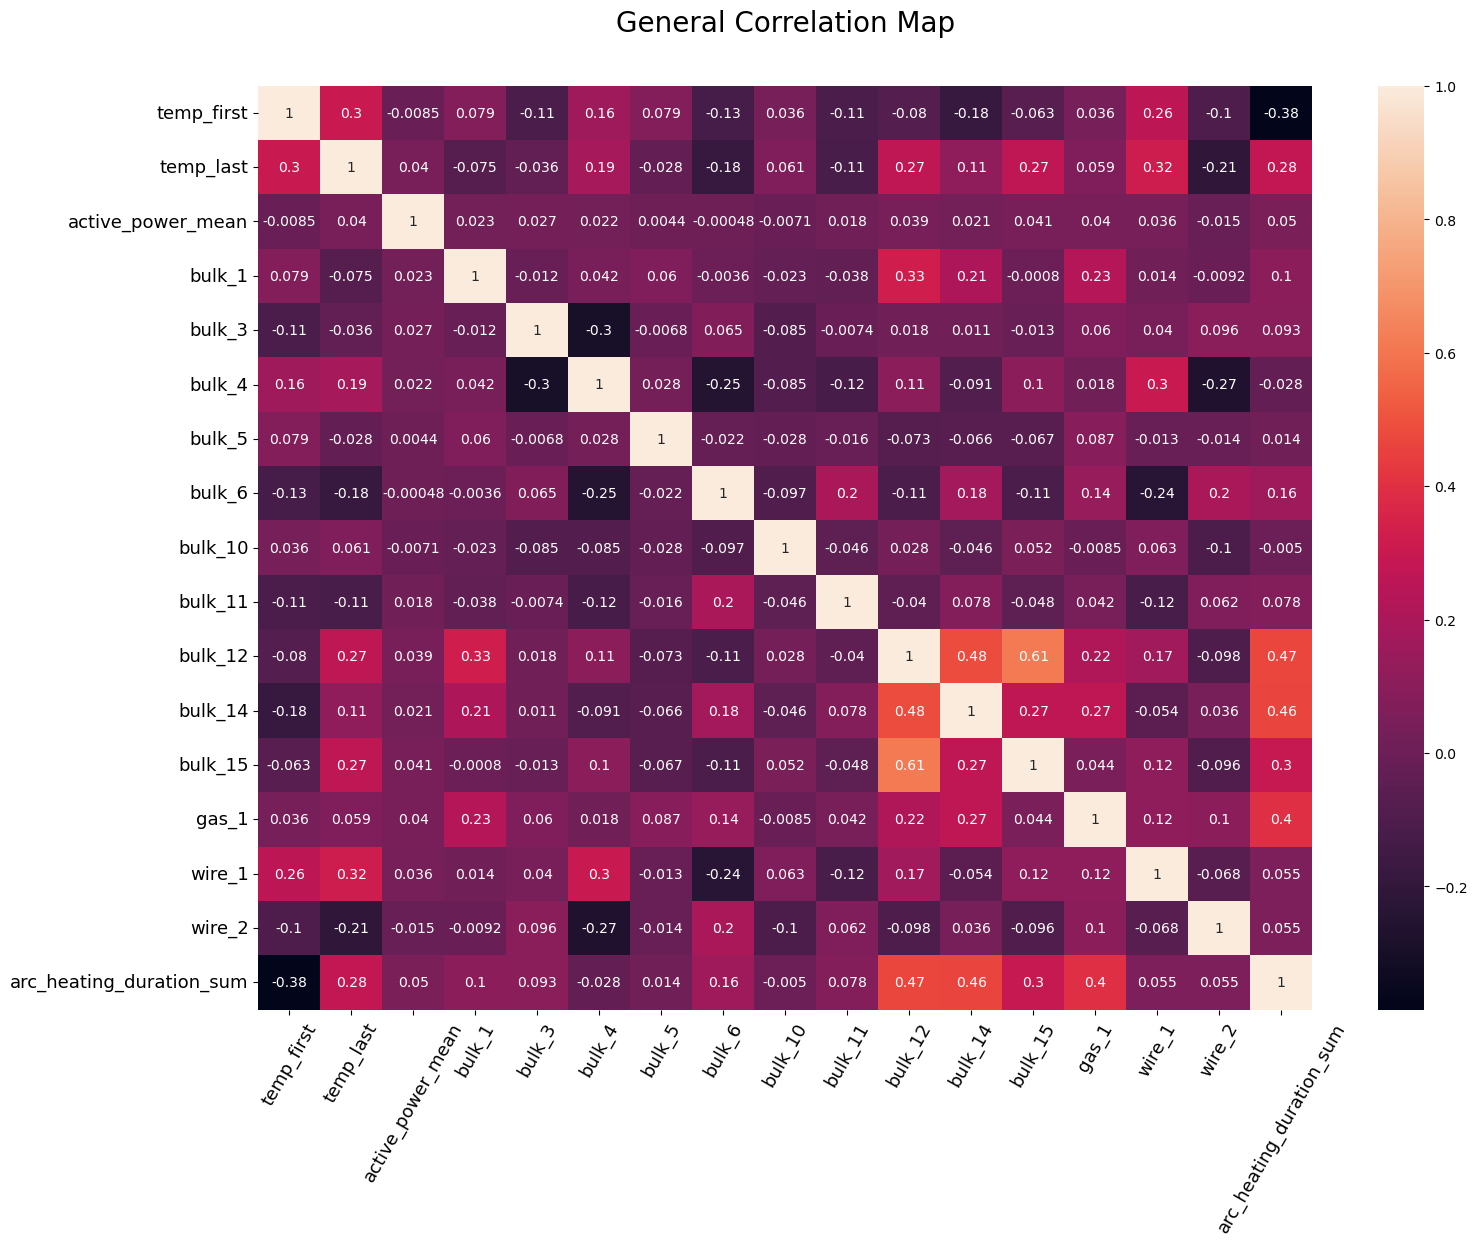

In [97]:
plt.figure(figsize=(17,12))
plt.title('General Correlation Map', y=1.05, size = 20)
sns.heatmap(whole_data.drop('key',axis=1).corr(), annot=True)
plt.tick_params(axis='x', labelrotation=60, labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.show()

## <font color='blue'>Step 5/8: Data Preparation</font>

### Getting train and test samples.

In [98]:
features = whole_data.drop(['temp_last', 'key'], axis=1)
target = whole_data['temp_last']

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size = 0.25,
                                                                            random_state = 131223)

print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(1746, 16)
(1746,)
(583, 16)
(583,)


### Standardization
The data contains quantitative characteristics with different ranges of values. In order for the algorithm not to decide that the features with great values and scatter are more important, let’s bring them to a common scale.

In [99]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = pd.DataFrame(scaler.transform(features_train), columns=features_train.columns)
features_test_scaled = pd.DataFrame(scaler.transform(features_test), columns=features_test.columns)

In [100]:
print(features_train_scaled.head())

   temp_first  active_power_mean    bulk_1    bulk_3    bulk_4    bulk_5  \
0   -0.128710          -1.139773 -0.267211 -0.361792 -0.647363 -0.119007   
1    0.856188           2.117773  1.918223  1.524690  0.216674 -0.119007   
2   -2.869297           0.396344 -0.267211  2.535305 -0.647363 -0.119007   
3   -0.257175          -0.508605  3.294237 -0.617814  0.877407 -0.119007   
4   -1.284895          -0.119530 -0.267211  2.104109 -0.647363 -0.119007   

     bulk_6   bulk_10  bulk_11   bulk_12   bulk_14   bulk_15     gas_1  \
0 -0.416652 -0.235216 -0.18708 -1.329516  0.813223  0.965445 -0.347971   
1 -0.416652 -0.235216 -0.18708  0.272976 -0.663634  0.953714  1.860343   
2  2.058499 -0.235216 -0.18708 -1.329516  1.834717 -1.415854 -0.772149   
3 -0.416652 -0.235216 -0.18708  1.875468  1.170131 -0.207609 -0.705035   
4  2.865215 -0.235216 -0.18708 -0.665984  0.665538 -1.415854 -0.089947   

     wire_1    wire_2  arc_heating_duration_sum  
0 -1.108878 -0.522675                 -0.979058 

In [101]:
print(features_test_scaled.head())

   temp_first  active_power_mean    bulk_1    bulk_3    bulk_4    bulk_5  \
0    0.599258          -1.669018 -0.267211 -0.617814 -0.647363 -0.119007   
1    0.813366           0.163965 -0.267211 -0.617814  0.792698 -0.119007   
2   -0.728214          -0.589735 -0.267211  3.734569 -0.647363 -0.119007   
3   -1.199252          -0.498522 -0.267211  1.659439 -0.647363 -0.119007   
4   -0.813857          -0.384475 -0.267211 -0.617814 -0.647363 -0.119007   

     bulk_6   bulk_10   bulk_11   bulk_12   bulk_14   bulk_15     gas_1  \
0  2.241843 -0.235216  0.684452 -1.329516 -0.442106 -1.415854  0.273914   
1 -0.416652 -0.235216 -0.187080 -0.046270 -0.257499 -0.219340 -0.898383   
2 -0.416652 -0.235216 -0.187080 -0.058790 -0.663634  0.965445 -0.082477   
3  4.863670 -0.235216 -0.187080 -0.665984  1.367045 -0.184148  3.287070   
4  0.390064 -0.235216 -0.187080  0.316794  0.554773  0.414109  0.683252   

     wire_1    wire_2  arc_heating_duration_sum  
0 -1.312276  0.441323                 -0.8

## <font color='blue'>Step 6/8: Training Machine Learning Models</font>

### A function for automatically selecting the best hyperparameters

In [102]:
def grid_search(model, params, features, target, cv):


    grid_search = GridSearchCV(model,
                      param_grid=params,
                      cv = cv,
                      scoring = 'neg_mean_absolute_error',
                      n_jobs = -1,
                      verbose = 10
                    )


    grid_search.fit(features, target)




    return (grid_search.best_params_, grid_search.best_score_,
            grid_search.cv_results_['mean_fit_time'][grid_search.best_index_],
            grid_search.cv_results_['mean_score_time'][grid_search.best_index_])


### Trying different models

**Ridge Regression**

In [103]:
%%time

# Ridge model
ridge = Ridge(random_state = 131223)

# parameters for tuning
ridge_params = {'alpha' : list(np.arange(0,1,0.2))}

# tuning
results_ridge = grid_search(ridge,ridge_params, features_train_scaled, target_train, 3)

# saving the tuning results into vaiables
ridge_params_best = results_ridge[0]
ridge_mae = abs(results_ridge[1])
ridge_fit_time = results_ridge[2]
ridge_score_time = results_ridge[3]

# displaying the best parameters
print('Best parameters: ', ridge_params_best)
print('Best MAE: ', ridge_mae)
print('Fitting time Ridge:', ridge_fit_time)
print('Scoring time Ridge:', ridge_score_time)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters:  {'alpha': 0.8}
Best MAE:  6.438648074567845
Fitting time Ridge: 0.006648699442545573
Scoring time Ridge: 0.005652586619059245
CPU times: total: 109 ms
Wall time: 5.59 s


**Lasso Regression**

In [104]:
%%time

# Lasso model
lasso = Lasso(random_state = 131223)

# parameters for tuning
lasso_params = {'alpha' : list(np.arange(0,1,0.2))}

# tuning
results_lasso = grid_search(lasso, lasso_params, features_train_scaled, target_train, 3)

# saving the tuning results into variables
lasso_params_best = results_lasso[0]
lasso_mae = abs(results_lasso[1])
lasso_fit_time = results_lasso[2]
lasso_score_time = results_lasso[3]

# displaying the best parameters
print('Best parameters: ', lasso_params_best)
print('Best MAE: ', lasso_mae)
print('Fitting time Lasso:', lasso_fit_time)
print('Scoring time Lasso:', lasso_score_time)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters:  {'alpha': 0.2}
Best MAE:  6.425868175982775
Fitting time Lasso: 0.00863798459370931
Scoring time Lasso: 0.003989696502685547
CPU times: total: 219 ms
Wall time: 111 ms


**Random Forest Regression**

In [105]:
%%time

# Random Forest Regressor model
forest = RandomForestRegressor(random_state = 131223)

# parameters for tuning
forest_params = {'n_estimators' : list(range(10, 310, 100)),
                'max_depth' : list(range(2,7,2))}

# tuning
results_forest = grid_search(forest, forest_params, features_train_scaled, target_train, 3)

# tuning results
forest_params_best = results_forest[0]
forest_mae = abs(results_forest[1])
forest_fit_time = results_forest[2]
forest_score_time = results_forest[3]

# displaying the best parameters
print('Best parameters: ', forest_params_best)
print('Best MAE: ', forest_mae)
print('Fitting time Forest:', forest_fit_time)
print('Scoring time Forest:', forest_score_time)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters:  {'max_depth': 7, 'n_estimators': 110}
Best MAE:  6.332439849742612
Fitting time Forest: 3.0091649691263833
Scoring time Forest: 0.02393619219462077
CPU times: total: 2.17 s
Wall time: 9.9 s


**Light gradient-boosting machine (LightGBM)**

In [106]:
%%time

# LightGBM Regressor model
lgbm = LGBMRegressor(random_state = 131223)

# parameters for tuning
lgbm_params = {
    
              # parameters for overfitting control
              'learning_rate' : list(np.arange(0.1, 0.9, 0.2)),
              'max_depth' : list(range(6,10)),
              'num_leaves' : list(range(31,93, 30)),
             # 'min_data_in_leaf' : list(range(100,10000, 1000)),
                
              # parameters for speed control
              #'num_iterations' : list(range(50,500,50))
              #'feature_fraction': list(range(5,15,5)),
              #'bagging_fraction' : list(np.arange(0.25 ,0.75, 0.25)),
}

# tuning
results_lgbm = grid_search(lgbm, lgbm_params, features_train_scaled, target_train, 3)

# saving the best parameters into variables
lgbm_params_best = results_lgbm[0]
lgbm_mae = abs(results_lgbm[1])
lgbm_fit_time = results_lgbm[2]
lgbm_score_time = results_lgbm[3]

# displaying the best parameters
print('Best parameters: ', lgbm_params_best)
print('Best MAE: ', lgbm_mae)
print('Fitting time LGBM:', lgbm_fit_time)
print('Scoring time LGBM', lgbm_score_time)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 1746, number of used features: 16
[LightGBM] [Info] Start training from score 1593.329324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

**CatBoost**

In [107]:
%%time

# CatBoostRegressor model
catboost = CatBoostRegressor(random_state = 131223, loss_function = 'MAE')

# parameters for tuning
catboost_params = {
              # parameters for overfitting control
              'learning_rate' : list(np.arange(0.1, 0.9, 0.2)),  
              'depth' : list(range(6,10)),
             # 'l2_leaf_reg' : list(np.arange(0.1, 0.9, 0.2)),
    
              # parameters for speed control
              #'random_strength' : list(np.arange(0.1, 0.9, 0.2)),
              #'iterations': list(range(100,2000,200))
             
}

# tuning
results_catboost = grid_search(catboost, catboost_params, features_train_scaled, target_train, 3)

# saving the best parameters into variables
catboost_params_best = results_catboost[0]
catboost_mae = abs(results_catboost[1])
catboost_fit_time = results_catboost[2]
catboost_score_time = results_catboost[3]


# displaying the best parameters
print('Best parameters: ', catboost_params_best)
print('Best MAE: ', catboost_mae)
print('Fitting time CatBoost:', catboost_fit_time)
print('Scoring time CatBoost:', catboost_score_time)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
0:	learn: 7.7300105	total: 139ms	remaining: 2m 18s
1:	learn: 7.5358867	total: 143ms	remaining: 1m 11s
2:	learn: 7.3853197	total: 148ms	remaining: 49.3s
3:	learn: 7.2508674	total: 153ms	remaining: 38.1s
4:	learn: 7.1014289	total: 158ms	remaining: 31.4s
5:	learn: 6.9766835	total: 163ms	remaining: 27s
6:	learn: 6.8409960	total: 167ms	remaining: 23.7s
7:	learn: 6.7258455	total: 172ms	remaining: 21.3s
8:	learn: 6.6582062	total: 177ms	remaining: 19.4s
9:	learn: 6.5658353	total: 182ms	remaining: 18s
10:	learn: 6.4954642	total: 186ms	remaining: 16.8s
11:	learn: 6.4224582	total: 191ms	remaining: 15.8s
12:	learn: 6.3501215	total: 196ms	remaining: 14.9s
13:	learn: 6.3004794	total: 201ms	remaining: 14.2s
14:	learn: 6.2579995	total: 206ms	remaining: 13.5s
15:	learn: 6.2097420	total: 211ms	remaining: 13s
16:	learn: 6.1597327	total: 215ms	remaining: 12.5s
17:	learn: 6.0793611	total: 220ms	remaining: 12s
18:	learn: 6.0290479	total: 226ms	rem

## <font color='blue'>Step 7/8: Choosing the best model</font>

### Let's choose the best model

In [108]:
results_table = pd.DataFrame({'Model' : ['Ridge',
                                         'Lasso',
                                         'Forest',
                                         'LGBM',
                                         'CatBoost'],
                              
                              'MAE' : [ridge_mae,
                                       lasso_mae,
                                       forest_mae,
                                       lgbm_mae,
                                       catboost_mae],
                              
                              'Params': [ridge_params_best,
                                         lasso_params_best,
                                        forest_params_best,
                                         lgbm_params_best,
                                         catboost_params_best],
                              
                              'Fitting Time': [round(ridge_fit_time, 2),
                                               round(lasso_fit_time, 2),
                                              round(forest_fit_time, 2), 
                                               round(lgbm_fit_time, 2),
                                              round(catboost_fit_time, 2)],
                             })                                                                         

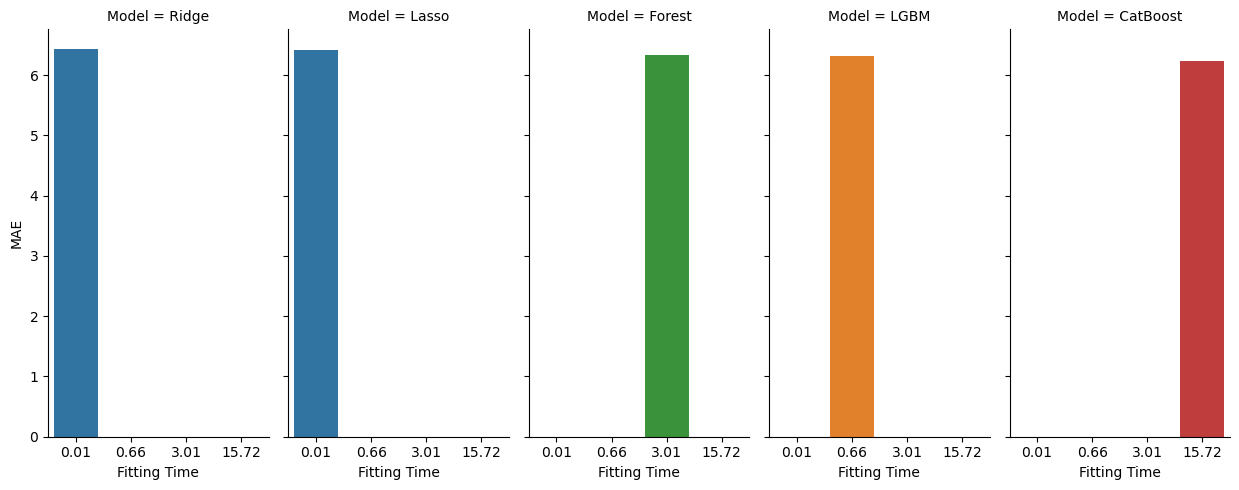

In [109]:
sns.catplot(data=results_table, x="Fitting Time", y="MAE", col="Model", kind="bar", aspect=0.5 )
plt.show()

Every model falls into our accuracy frame (below 6.8). In this case, we will pick the one that works the fastest: The Ridge Regression model

In [110]:
print(ridge_params_best)

{'alpha': 0.8}


### Let's create a dummy model to determine the adequacy of our chosen model

In [111]:
%%time

dummy = DummyRegressor()

dummy_fitting_time_start = time.time()
dummy.fit(features_train_scaled, target_train)
dummy_fitting_time_end = time.time()


dummy_predicting_time_start = time.time()
prediction_dummy = dummy.predict(features_test_scaled)
dummy_predicting_time_end = time.time()

dummy_mae = mean_absolute_error(prediction_dummy, target_test)

print(f'Dummy MAE: {dummy_mae}, Fitting time: {round(dummy_fitting_time_end - dummy_fitting_time_start,2)}, Predicting time: \
{round(dummy_predicting_time_end- dummy_predicting_time_start,2)}')

Dummy MAE: 8.358139850164745, Fitting time: 0.0, Predicting time: 0.0
CPU times: total: 0 ns
Wall time: 1.98 ms


In order to consider our model adequate, it must give a MAE not lower than 8.36 on the testing sample.

### Best model testing

In [112]:
ridge_test = Ridge(alpha=0.8, random_state=131223)

ridge_fitting_time = time.time()
ridge_test.fit(features_train_scaled, target_train)
ridge_fitting_time_end = time.time()

ridge_predicting_time = time.time()
ridge_prediction = ridge_test.predict(features_test_scaled)
ridge_predicting_time_end = time.time()

ridge_test_mae = mean_absolute_error(ridge_prediction, target_test)

print(f'Ridge Testing MAE: {ridge_test_mae}, Ridge Testing Fitting time: {round(ridge_fitting_time_end - ridge_fitting_time,2)}, Ridge Testing Predicting time: \
{round(ridge_predicting_time_end - ridge_predicting_time,2)}')

Ridge Testing MAE: 6.399766769530572, Ridge Testing Fitting time: 0.0, Ridge Testing Predicting time: 0.0


### Feature Importance

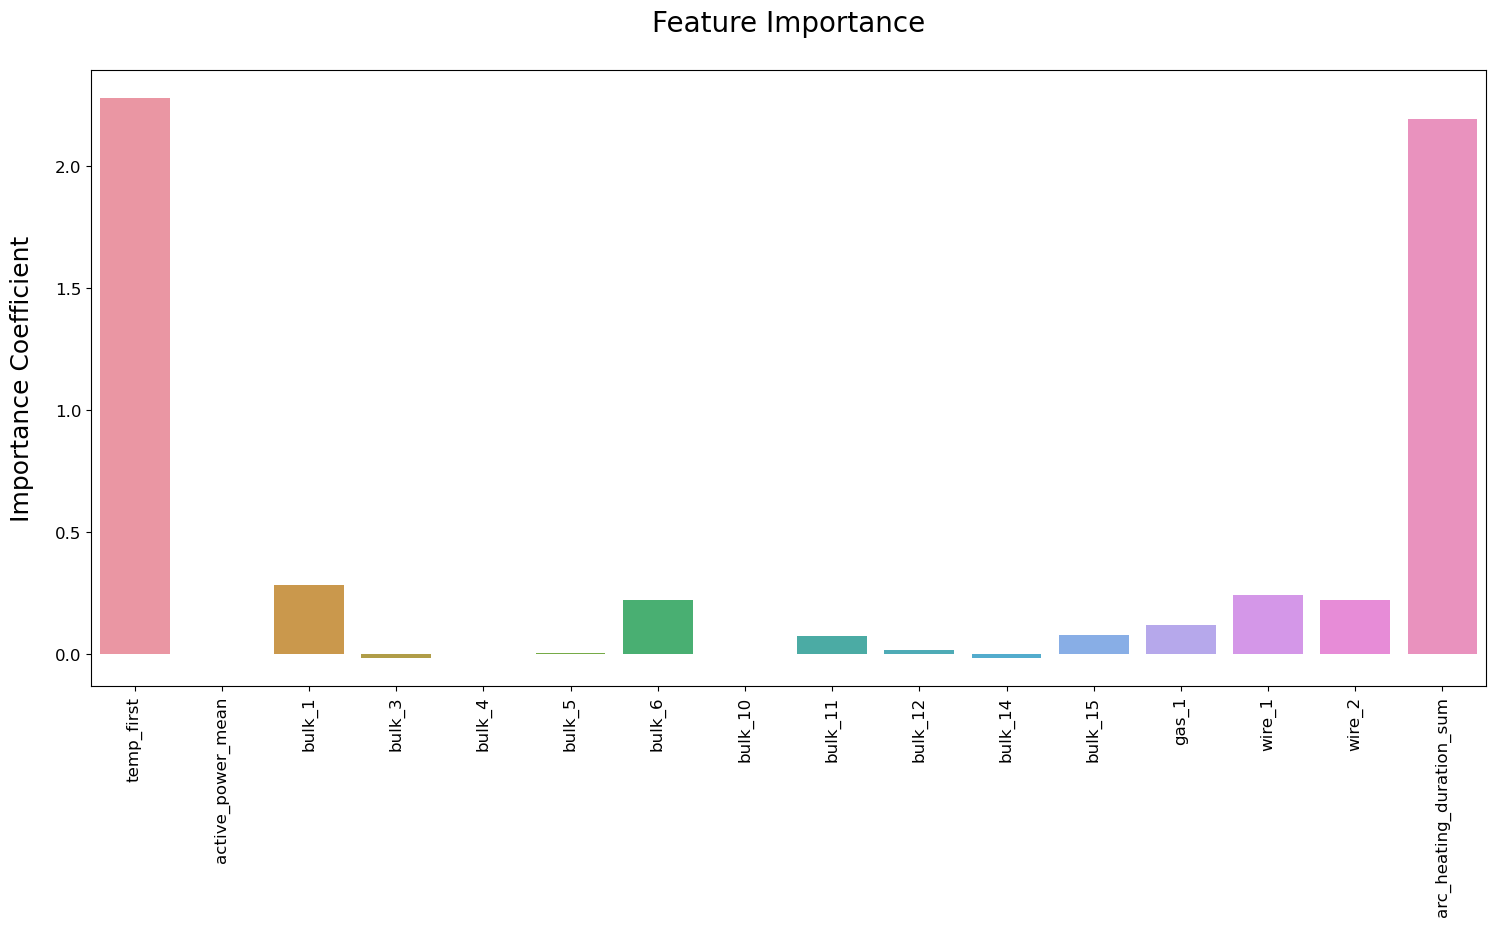

In [113]:
from sklearn.inspection import permutation_importance

# calculating the feature importance
results = permutation_importance(ridge_test, features_test_scaled, target_test, scoring='neg_mean_absolute_error')
# saving the importance coeffs into the "importance" variable
importance = results.importances_mean

# creating a dataframe for the importances
frame = pd.DataFrame(columns=features_test_scaled.columns)
frame.loc[0] = importance

# creating a graph showing the feature importance
plt.figure(figsize=(18,8))
plt.title('Feature Importance', size = 20, y = 1.05)
sns.barplot(data=frame)
plt.ylabel('Importance Coefficient', size = 18, labelpad = 15)
plt.tick_params(axis='x', labelrotation=90, labelsize = 'large')
plt.tick_params(axis='y', labelsize = 'large')
plt.show()

The most important features for our Ridge model on the test dataset are the initial temperature and the sum of the arc heating time.

### Comparing the predictions with the test target

In [114]:
compare = pd.concat([pd.Series(target_test, name='target'),
                     pd.Series(ridge_prediction.astype('int64'), index=target_test.index, name='prediction')], axis=1)
compare

,target,prediction
2253,1579,1584
589,1594,1593
1736,1594,1592
1007,1572,1579
519,1584,1590
...,...,...
1680,1589,1590
2441,1591,1583
164,1578,1582
814,1587,1588


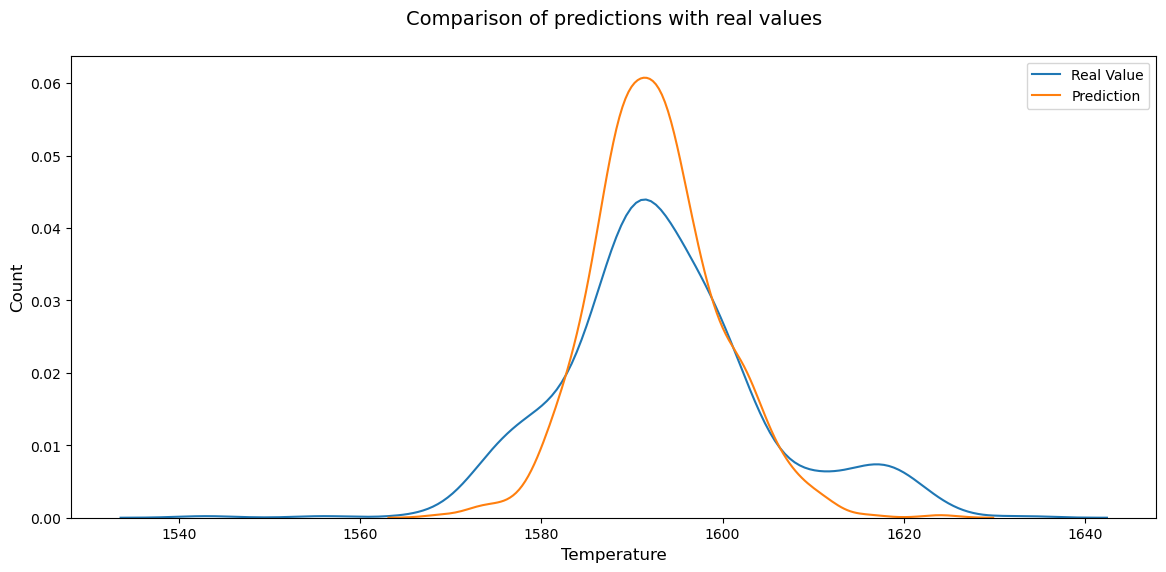

In [115]:
plt.figure(figsize=(14, 6))

plt.title('Comparison of predictions with real values', size = 14, y = 1.05)

sns.kdeplot(data=compare['target'], label='Target')
sns.kdeplot(data=compare['prediction'], label='Prediction')

plt.legend(loc='best', labels= ['Real Value','Prediction'])

plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

## <font color='blue'>Step 8/8: General conclusion and recommendations to the customer</font>

- **Within the framework of this project the following was accomplished**:
     - Data on temperature, gas volume, sand material volume, wire material volume, active and reactive power were analyzed, filtered and cleaned.
     - The data was collected into a common dataframe, analyzed and cleaned.
     - In order to correctly merge the dataframes, two new features were created: arc_heating_duration_sum and active_power_mean.
     - The data was scaled and divided into training and test sets in a 75/25 ratio.
     - Ridge, Lasso, Random Forest, LightGBM and CatBoost models were tested using the best hyper-parameters tuned during the process.
     - Ridge(alpha=0.8) was selected as the best model, with a MAE of 6.44 on the training set and the fastest training time.
     - The best model was successfully tested on the test set, showing a MAE of 6.40, outperforming the random model (MAE of 8.36).
     - A conclusion was drawn about the importance of each feature.
- **Recommendations to the customer**:
     - It is advisable to take into account that for the selected predictive model, in each batch, the initial temperature and the total duration of arc heating play an important role.